### Seaborn plotting

How does seaborn work and how can you manipulate it to get the best plots?

In [21]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
%matplotlib inline

#### Seaborn basics  
How do you produce a plot?

Numpy is the python library for handling maths.  
Matplotlib is a python library built on Numpy which draws plots.  
Seaborn is a python library built on Numpy, pandas and matllibplot which draws beautiful, customisable plots.  

There is LOTS of online help in making your seaborn plots exactly how you want them:  

    https://seaborn.pydata.org/introduction.html

#### Matplotlib

Matplot is the python library for plotting.  It plots data on *Axes* in a *Figure*.  For our purposes the *Figure* is a jupyter notebook cell and the *Axes* is the graph.


In [ ]:
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

Here's the anatomy of a matplotlib figure

![title](Parts_of_plot.webp)

All of these features can be controled

Make up some data to plot

In [23]:
data = np.ones(100)
data[70:] -= np.arange(30)

In [198]:
data

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,
        -6.,  -7.,  -8.,  -9., -10., -11., -12., -13., -14., -15., -16.,
       -17., -18., -19., -20., -21., -22., -23., -24., -25., -26., -27.,
       -28.])

Define a figure space, put in some axes, plot the data on these axes

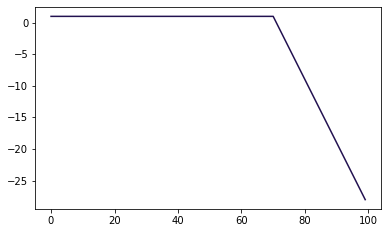

In [25]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.plot(data)

Modify the plot to set x and y limits and remove tick labels

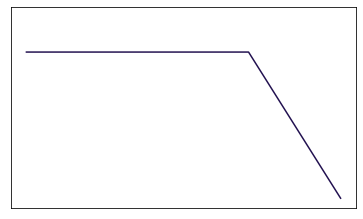

In [26]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.set_ylim([-30, 10])
ax.set_xticks([])
ax.set_yticks([])
ax.plot(data)


Change the size of the plot (default is inches)

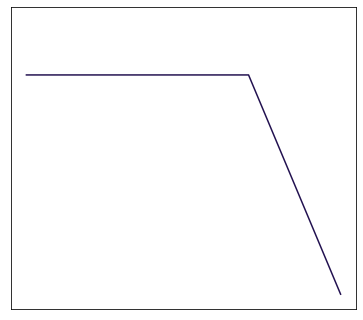

In [27]:
fig.set_size_inches(6, 6)
fig

Using cm instead via defining the conversion

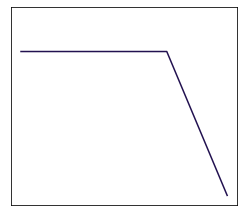

In [28]:
cm = 1/2.54
fig.set_size_inches(10*cm, 10*cm) 
fig

Text(0.5, 0.05, '"Stove Ownership" from xkcd by Randall Munroe')

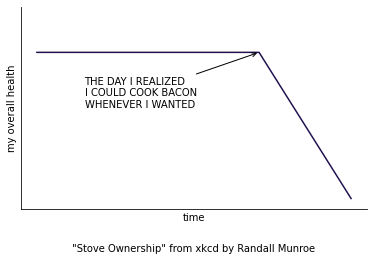

In [30]:
#define a figure
fig = plt.figure()
#add axes at set distances from the edges of the space
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#colour two of the axes to none to remove them
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')
# add ticks to the axes
ax.set_xticks([])
ax.set_yticks([])
#set the y axis limits
ax.set_ylim([-30, 10])
#add a lable on the figure
ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))
#plot the data
ax.plot(data)
#labl the axes
ax.set_xlabel('time')
ax.set_ylabel('my overall health')
#add a title
fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

We can apply an overall style to the plot

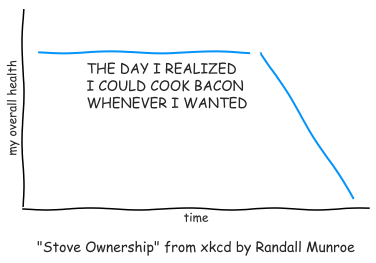

In [217]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Save to file

In [218]:
fig.savefig('bacon.png', dpi=100)

Seaborn is a library of styles which, like the 'xkcd' style here, works over Matplotlib.  Here we use a standard seaborn graph style (you will likely have seen this many times).

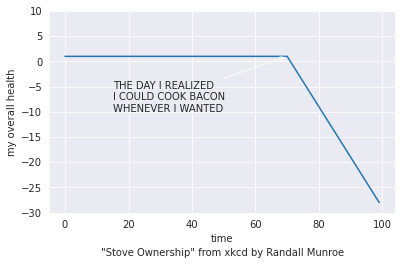

In [20]:
with sns.axes_style("darkgrid"):
    
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)
    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

Not as good as a cartoon, but maybe better for publications?

But seaborn does much more than just a default style.  It makes it easy to plot a whole range of graphs to explore your dataset.  Here's some data 

### Seaborn plot types

We'll look at some seaborn plots using a data set of floral organ lengths for 3 species of Iris from three habitats.  This data set has categorical data (species, site) and numerical site (the lengths).

In [131]:
! wget https://github.com/ckidner/PS4_data_analysis/raw/master/Iris.txt

--2022-07-13 13:39:26--  https://github.com/ckidner/PS4_data_analysis/raw/master/Iris.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ckidner/PS4_data_analysis/master/Iris.txt [following]
--2022-07-13 13:39:27--  https://raw.githubusercontent.com/ckidner/PS4_data_analysis/master/Iris.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4770 (4.7K) [text/plain]
Saving to: ‘Iris.txt’

Iris.txt            100%[===================>]   4.66K  --.-KB/s    in 0s      

2022-07-13 13:39:27 (9.50 MB/s) - ‘Iris.txt’ saved [4770/4770]



In [2]:
df=pd.read_table("Iris.txt")

In [133]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width     Species   Site
0           5.0          2.0           3.5          1.0  versicolor  Field
1           6.0          2.2           5.0          1.5   virginica  Field
2           5.5          2.3           4.0          1.3  versicolor  Field

Seaborn makes it easy to switch between different plot types, generating distribution plots by quantitiative or categorical datatypes, examine the realtionships between variation and combine these appraoches 

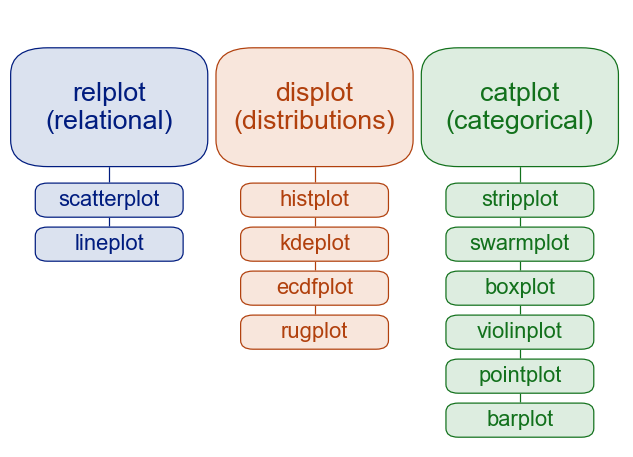

### Data distribution. displot
Shows the distribution of numerical data.

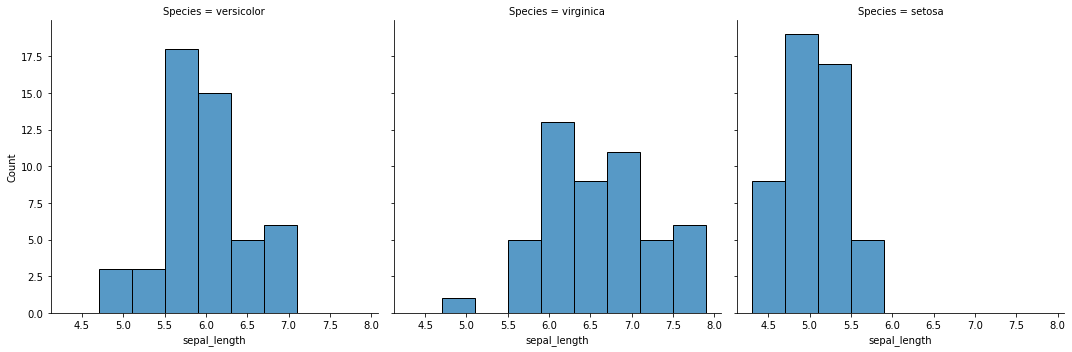

In [137]:
sns.displot(data=df, x="sepal_length", col="Species", kde=False)

We can get fancier, adding in categorical information by colouring by site and showing the continuous distribuiton of the data with kernel density plotting.

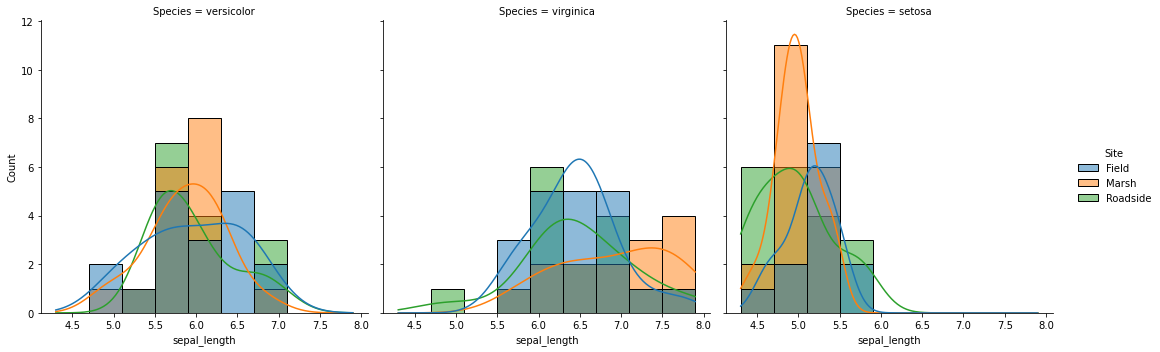

In [138]:
sns.displot(data=df, x="sepal_length", col="Species", hue = "Site", kde=True)

Or the other way round...

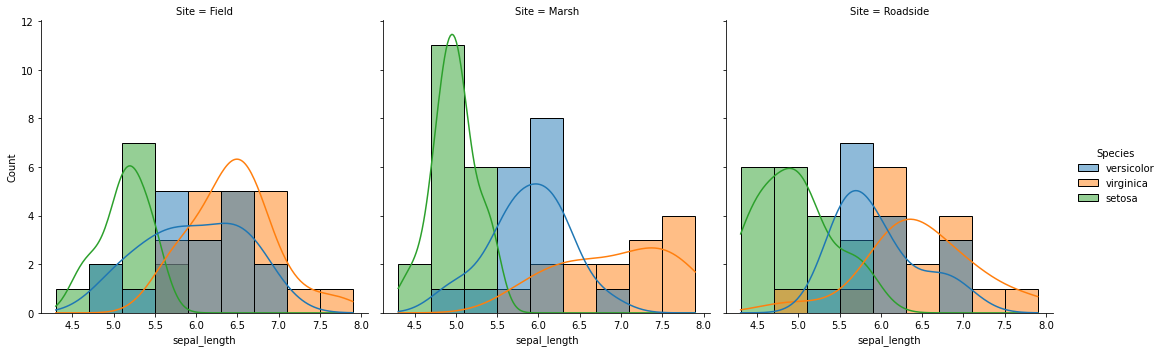

In [139]:
sns.displot(data=df, x="sepal_length", col="Site", hue = "Species", kde=True)

### Categorical data. catplot
We can focus on the categorical dimension, making that the x axis adn platting all the data points in a scatter plot along the y axis.  Colouring by site allows us toe present all the data.


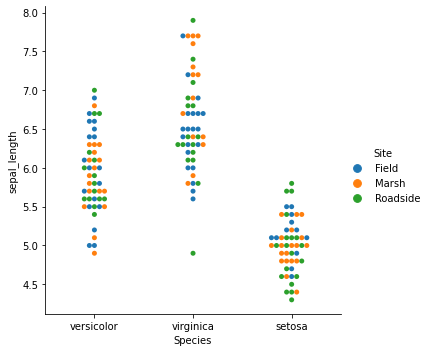

In [141]:
sns.catplot(data=df, kind="swarm", x="Species", y="sepal_length", hue="Site")

This is maybe too noisy to be able to see patterns.  We cam simplfy things to focus on difference beteen catagories.  Comparing Marsh and roadside in a split violin plot.

In [148]:
df2 = df[df.Site != "Field"]
sns.catplot(data=df2, kind="violin", x="Species", y="sepal_length", hue="Site", split=True)

Compare Marsh and Field

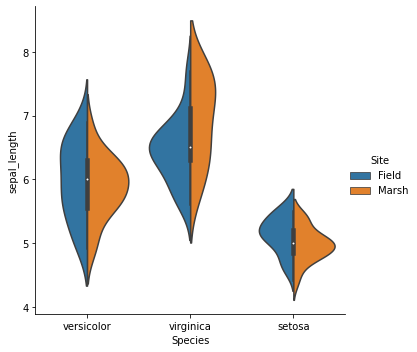

In [151]:
df2 = df[df.Site != "Roadside"]
sns.catplot(data=df2, kind="violin", x="Species", y="sepal_length", hue="Site", split=True)

Seaborn also using basic stats to present categorical data.  We can use means, median and confidence intervals, sd or SE.

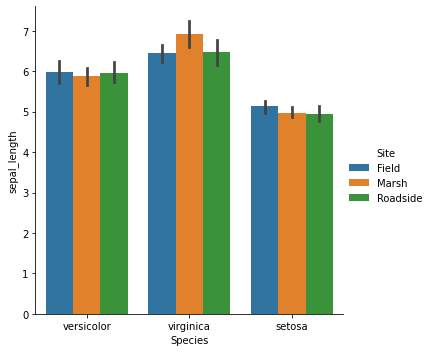

In [153]:
sns.catplot(data=df, kind="bar", x="Species", y="sepal_length", hue="Site")

Can show median and SE instead

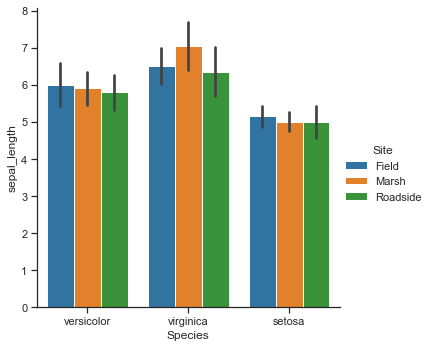

In [222]:
from numpy import median
sns.catplot(data=df, kind="bar", x="Species", y="sepal_length", hue="Site", estimator=median, ci="sd")

### relationships. 
To show the relationship between two numberical values we can use relplot

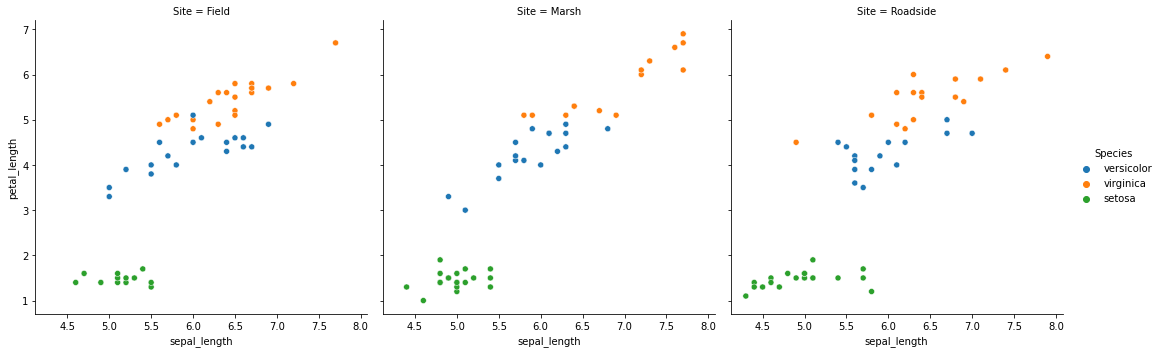

In [155]:
sns.relplot(
    data=df,
    x="sepal_length", y="petal_length", col="Site",
    hue="Species")

In [ ]:
These can have linear regression lines added, along with confidence boundaries.

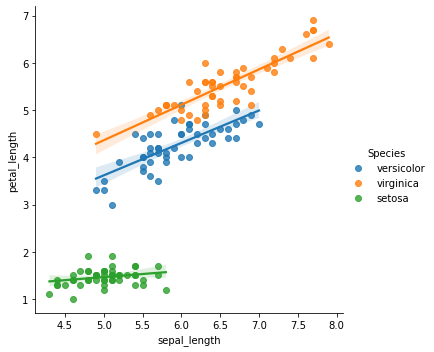

In [156]:
sns.lmplot(data=df, x="sepal_length", y="petal_length", hue="Species")

Separate out the species

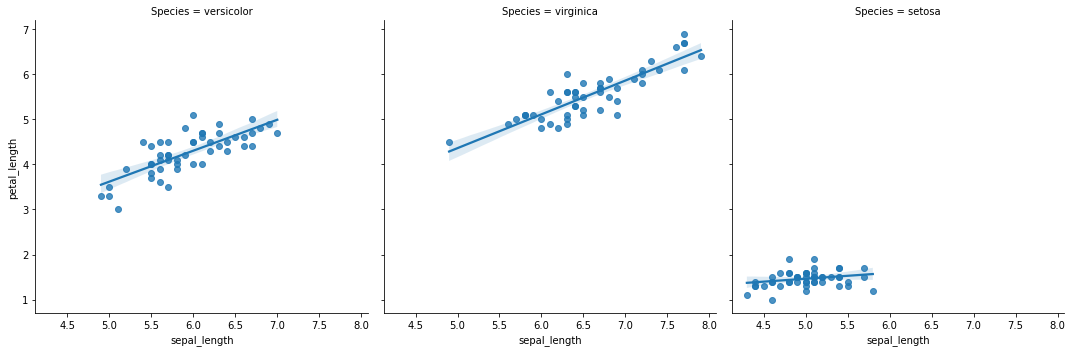

In [157]:
sns.lmplot(data=df, x="sepal_length", y="petal_length", col="Species")

### Other plot types

#### We can plot categorical data against each other using heatmaps.

In [ ]:
# calculate the correlation matrix for floral organ lengths
corr = df.corr()

In [5]:
corr

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

<AxesSubplot:>

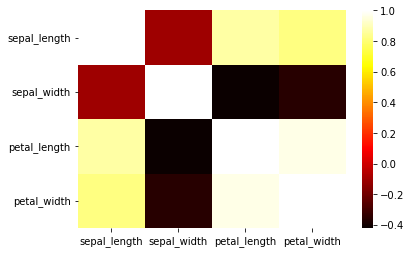

In [4]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = 'hot')

### Composite plots
It's often useful to present both catagorical plots and numeric plots together.  Seaborn's joint plot allows this.

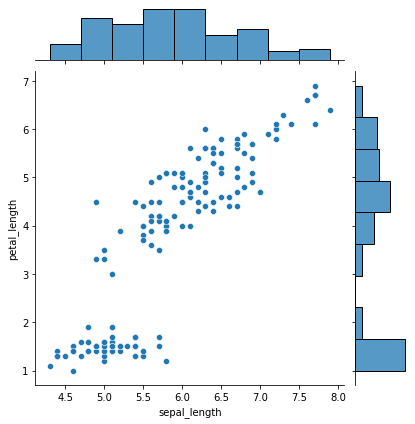

In [6]:
sns.jointplot(data=df, x="sepal_length", y="petal_length")

Adding colour to show species reveals the patterns in the data

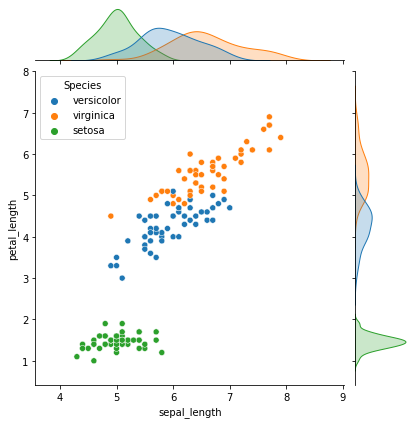

In [158]:
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

In [ ]:
Or bin the numerical data in a density plot

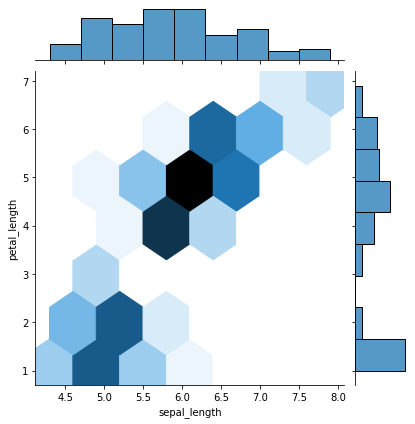

In [14]:
sns.jointplot(data=df, x="sepal_length", y="petal_length", kind="hex")

### Seaborn styles  
Seaborn has a number of default stypes which control the look of the plot

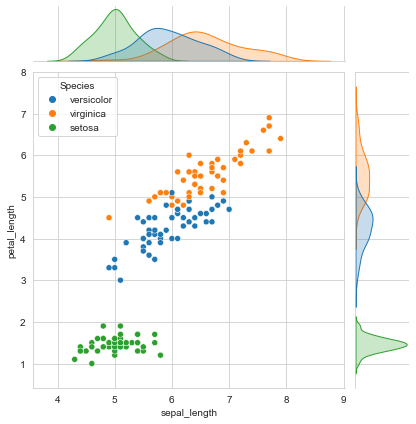

In [174]:
sns.set_style("whitegrid")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

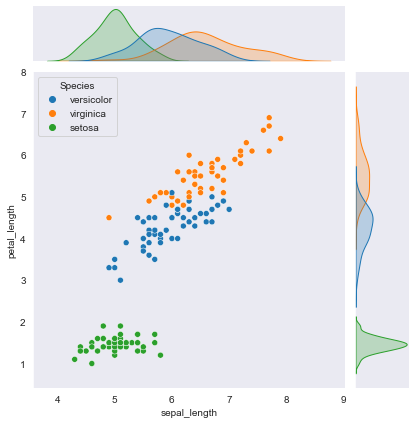

In [175]:
sns.set_style("dark")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

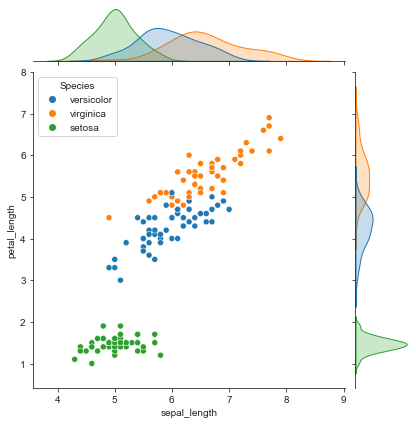

In [176]:
sns.set_style("ticks")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

Including some set of different types of presentation.

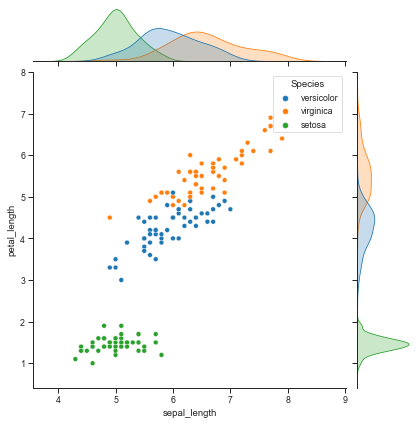

In [177]:
sns.set_context("paper")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

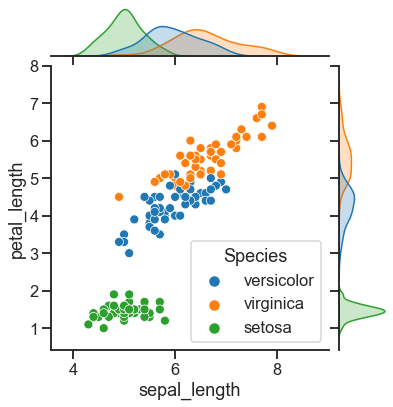

In [178]:
sns.set_context("talk")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

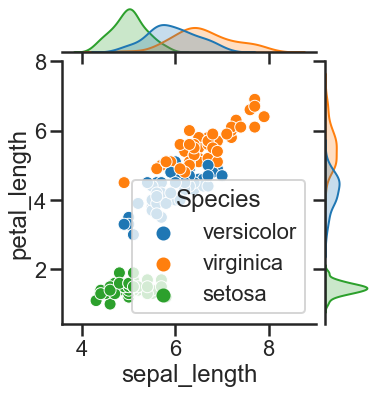

In [179]:
sns.set_context("poster")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

We need to move that legend box.

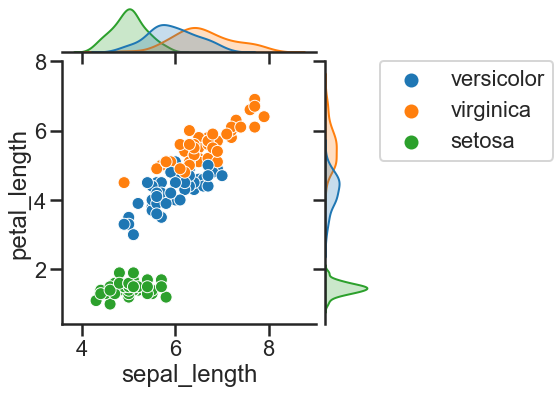

In [187]:
g = sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")
g.ax_joint.legend(bbox_to_anchor=(1.25,1), loc='upper left', borderaxespad=0)

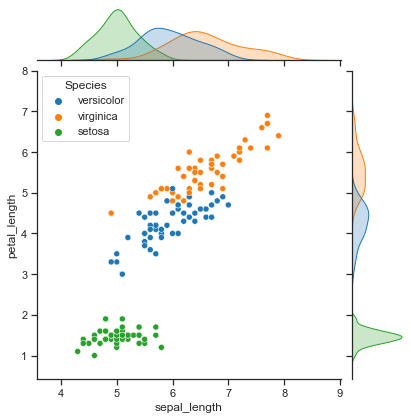

In [190]:
sns.set_context("notebook")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

### Seaborn colour palettes

Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. 

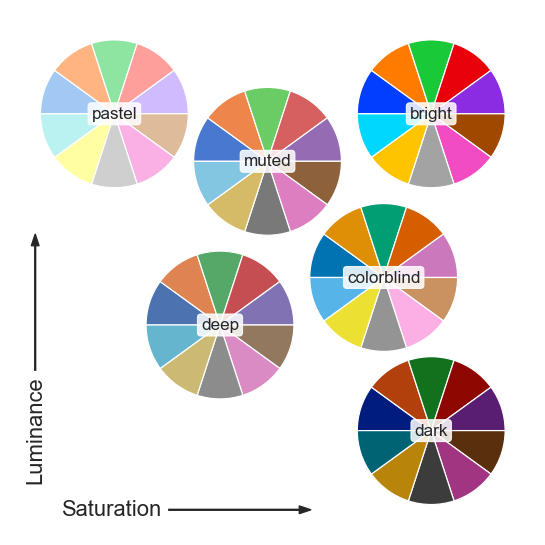

This is the current palette

In [15]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

We can specfiy a new one:

In [16]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [163]:
sns.set_palette('dark')

and re-do the last plot

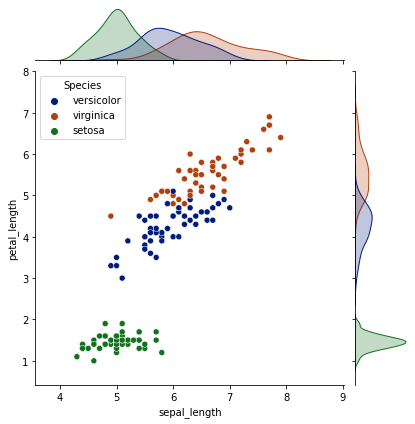

In [164]:
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

Here's the list of seaborn set palettes.  You can, of course customise your own palette.  There is lots more detail on this here: https://seaborn.pydata.org/tutorial/color_palettes.html   
tab10 is the default palette

 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [17]:
sns.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

In [18]:
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [19]:
sns.color_palette("terrain")

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

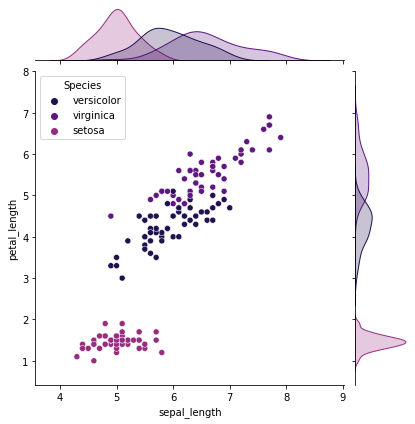

In [20]:
sns.set_palette("magma")
sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")

### An example data exploration to look at some aspects of plotting

https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

Import the data on Darwin's finches from github



Cadena CD, Zapata F, Jiménez I. 2017. Issues and perspectives in species   
delimitation using phenotypic data: Atlantean evolution in Darwin’s finches.    
Systematic Biology (https://academic.oup.com/sysbio/article/doi/10.1093/sysbio/syx071/4102004/Issues-and-Perspectives-in-Species-Delimitation)

Plot the data to show how the new taxonomy differs from the old taxonomy.

In [228]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
%matplotlib inline

In [ ]:
! wget https://github.com/zapataf/geospiza_morphology_2017/raw/master/CAS_Swarth_Geospiza.csv

Check the file structure

In [2]:
! head -3 CAS_Swarth_Geospiza.csv

Is csv with a header and with line numbers.  Read into pandas

In [230]:
df = pd.read_csv('CAS_Swarth_Geospiza.csv')
df.head(3)

Taxon       Institution  Museum No.  Island       Taxon-Island  \
0  G. conirostris  Rotheschild Mus.      1916.0  Darwin  conirostrisDarwin   
1  G. conirostris  Rotheschild Mus.      1918.0  Darwin  conirostrisDarwin   
2  G. conirostris  Rotheschild Mus.      1931.0  Darwin  conirostrisDarwin   

   New_Taxonomy New_Taxonomy_Island   Sex  Wing  Tail  Blength  Bdepth  \
0  G. propinqua     propinquaDarwin  Male  78.2  46.0     19.5    14.0   
1  G. propinqua     propinquaDarwin  Male  81.5  53.0     22.2    17.2   
2  G. propinqua     propinquaDarwin  Male  81.0  49.5     21.2    16.2   

   Bwidth  Tarsus  
0    11.0    25.2  
1    13.5    26.5  
2    12.2    23.5

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Taxon                486 non-null    object 
 1   Institution          486 non-null    object 
 2   Museum No.           485 non-null    float64
 3   Island               486 non-null    object 
 4   Taxon-Island         486 non-null    object 
 5   New_Taxonomy         486 non-null    object 
 6   New_Taxonomy_Island  486 non-null    object 
 7   Sex                  486 non-null    object 
 8   Wing                 486 non-null    float64
 9   Tail                 486 non-null    float64
 10  Blength              486 non-null    float64
 11  Bdepth               486 non-null    float64
 12  Bwidth               486 non-null    float64
 13  Tarsus               486 non-null    float64
dtypes: float64(7), object(7)
memory usage: 53.3+ KB


Museum number should not be a float.  Best change to string

In [126]:
df['Museum No.'] = df['Museum No.'].astype('str') 

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Taxon                486 non-null    object 
 1   Institution          486 non-null    object 
 2   Museum No.           486 non-null    object 
 3   Island               486 non-null    object 
 4   Taxon-Island         486 non-null    object 
 5   New_Taxonomy         486 non-null    object 
 6   New_Taxonomy_Island  486 non-null    object 
 7   Sex                  486 non-null    object 
 8   Wing                 486 non-null    float64
 9   Tail                 486 non-null    float64
 10  Blength              486 non-null    float64
 11  Bdepth               486 non-null    float64
 12  Bwidth               486 non-null    float64
 13  Tarsus               486 non-null    float64
dtypes: float64(6), object(8)
memory usage: 53.3+ KB


Do we have measures from both sexes?  We can use unique to see the different values in column'Sex'.

In [5]:
df['Sex'].unique()

array(['Male'], dtype=object)

We have 486 male specimens, 6 measurements, one category (sex) and infomation on species names (old and new), Insititution, Museum specimen numbers, and Island of origin

We have data from 18 islands and 9 species (originally 6 species)

In [6]:
df['Island'].unique().size

18

In [7]:
df['Island'].unique()

array(['Darwin', 'Genovesa', 'Santiago', 'Santa Cruz', 'Wolf', 'Marchena',
       'Pinta', 'Rabida', 'Fernandina', 'Isabela', 'Pinzon', 'Daphne',
       'Baltra', 'San Cristobal', 'Floreana', 'Santa Fe', 'Espanola',
       'Gardner'], dtype=object)

In [9]:
df['New_Taxonomy'].unique().size

9

In [202]:
df['Taxon'].unique().size

6

A very useful first examination of data is pairplot.  Pairplot plots all the numeric values against each other along with a histrogram of the distribution of each numeric value.  

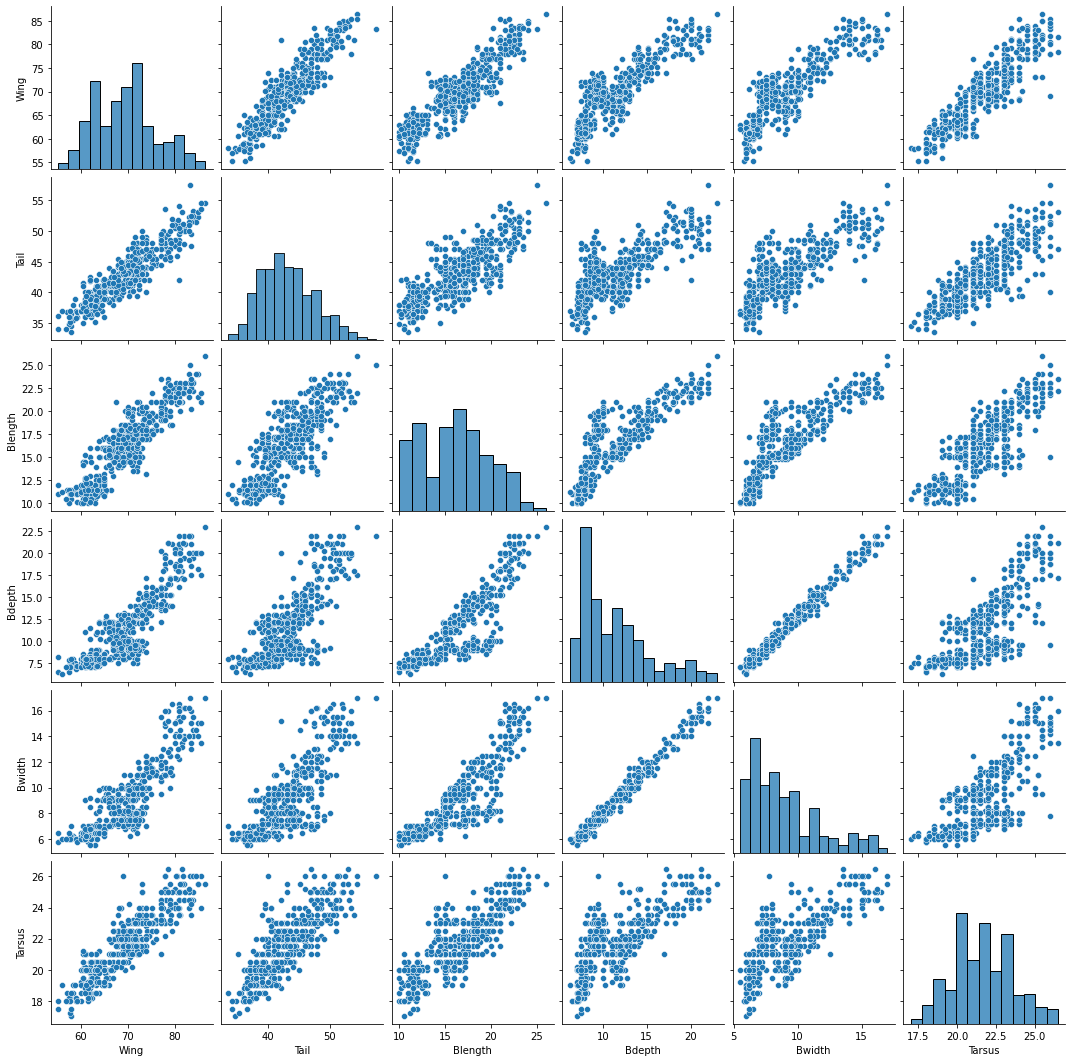

In [147]:
sns.pairplot(data=df)

So much plotting from a simple command!   

You can colour code the plots by any category you like

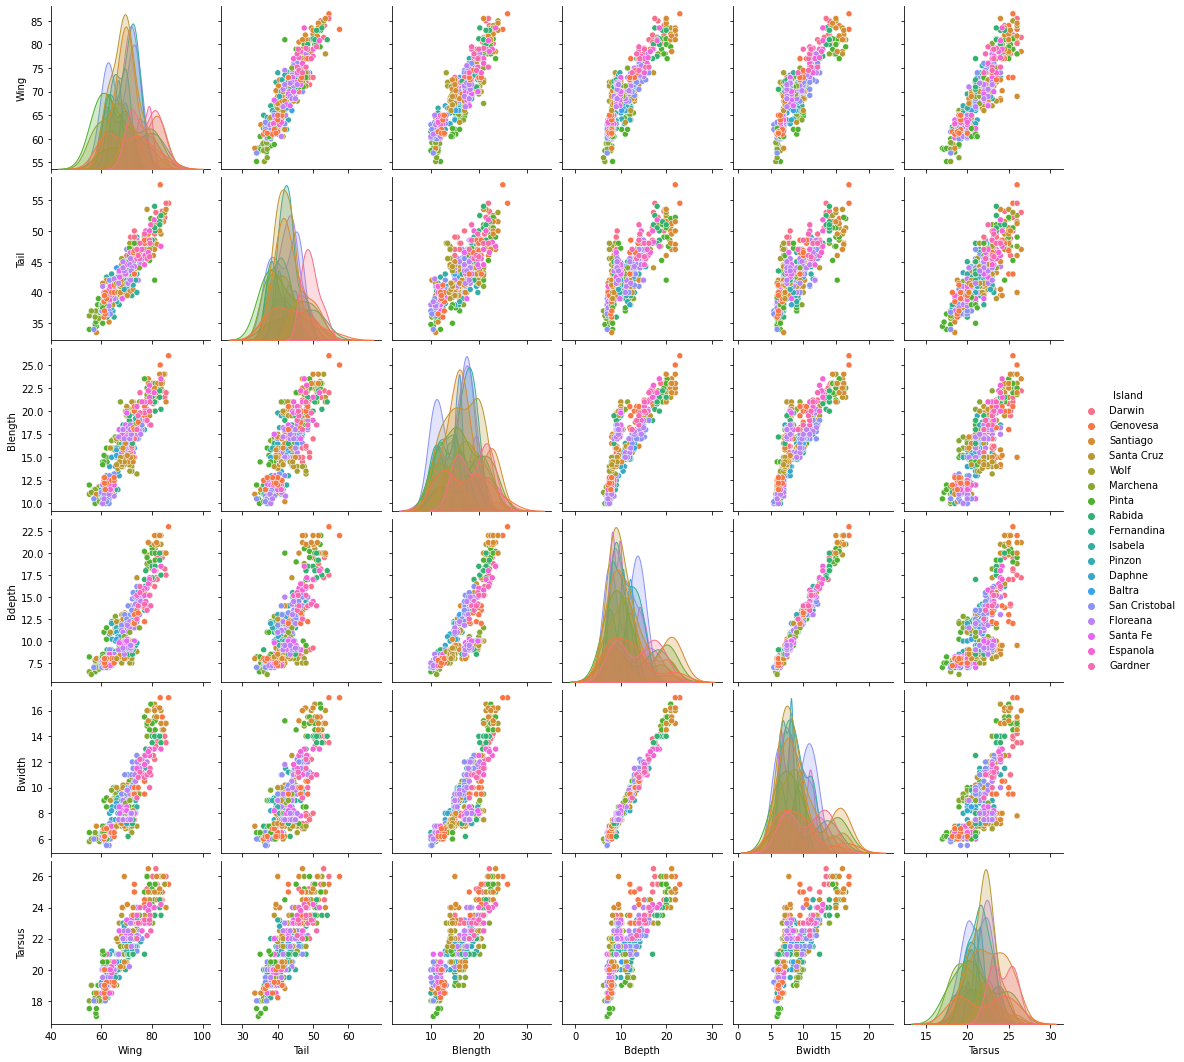

In [148]:
sns.pairplot(data=df,hue="Island")

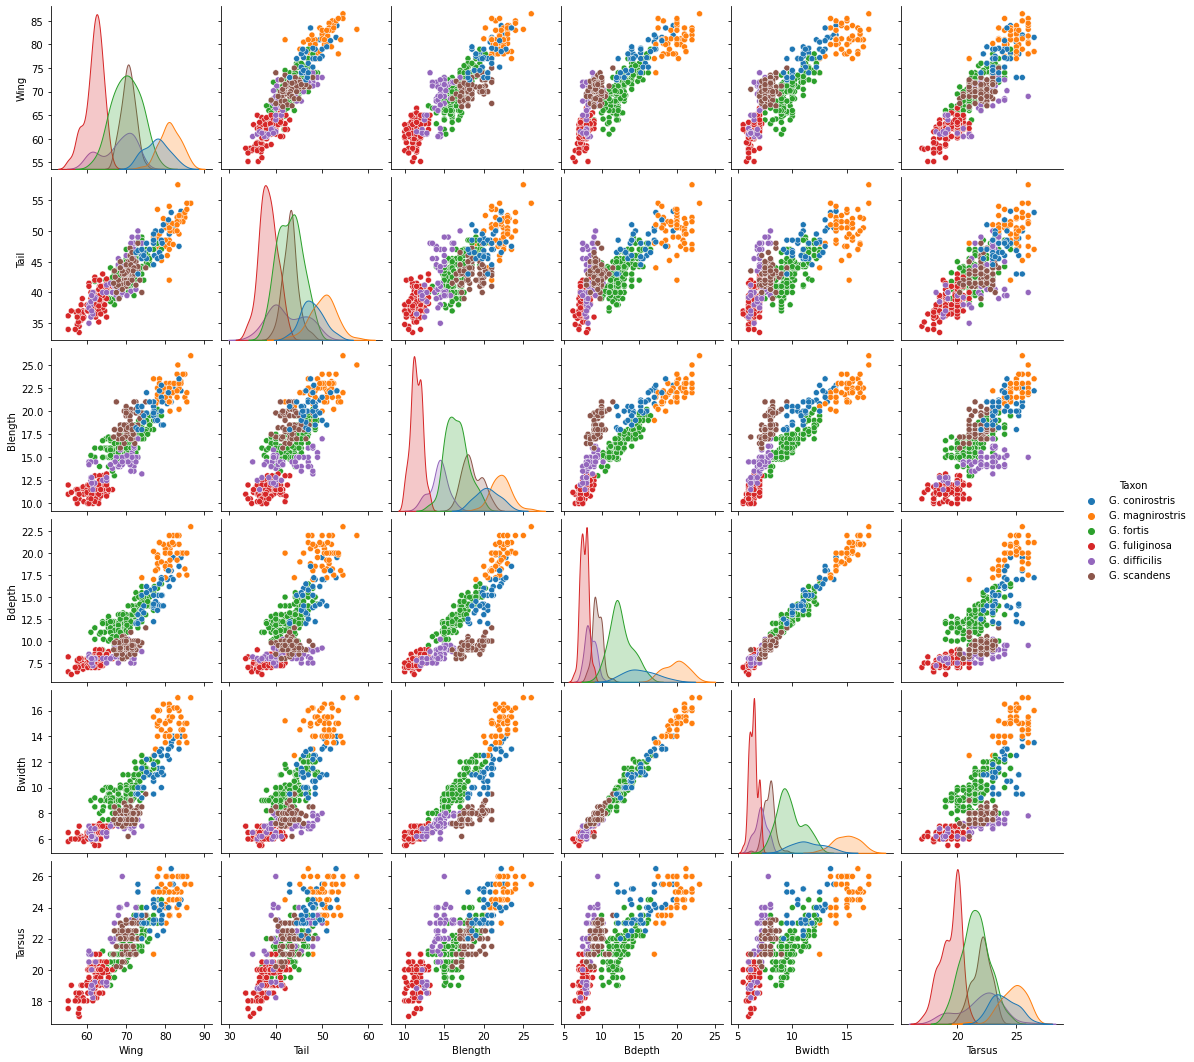

In [149]:
sns.pairplot(data=df,hue="Taxon")

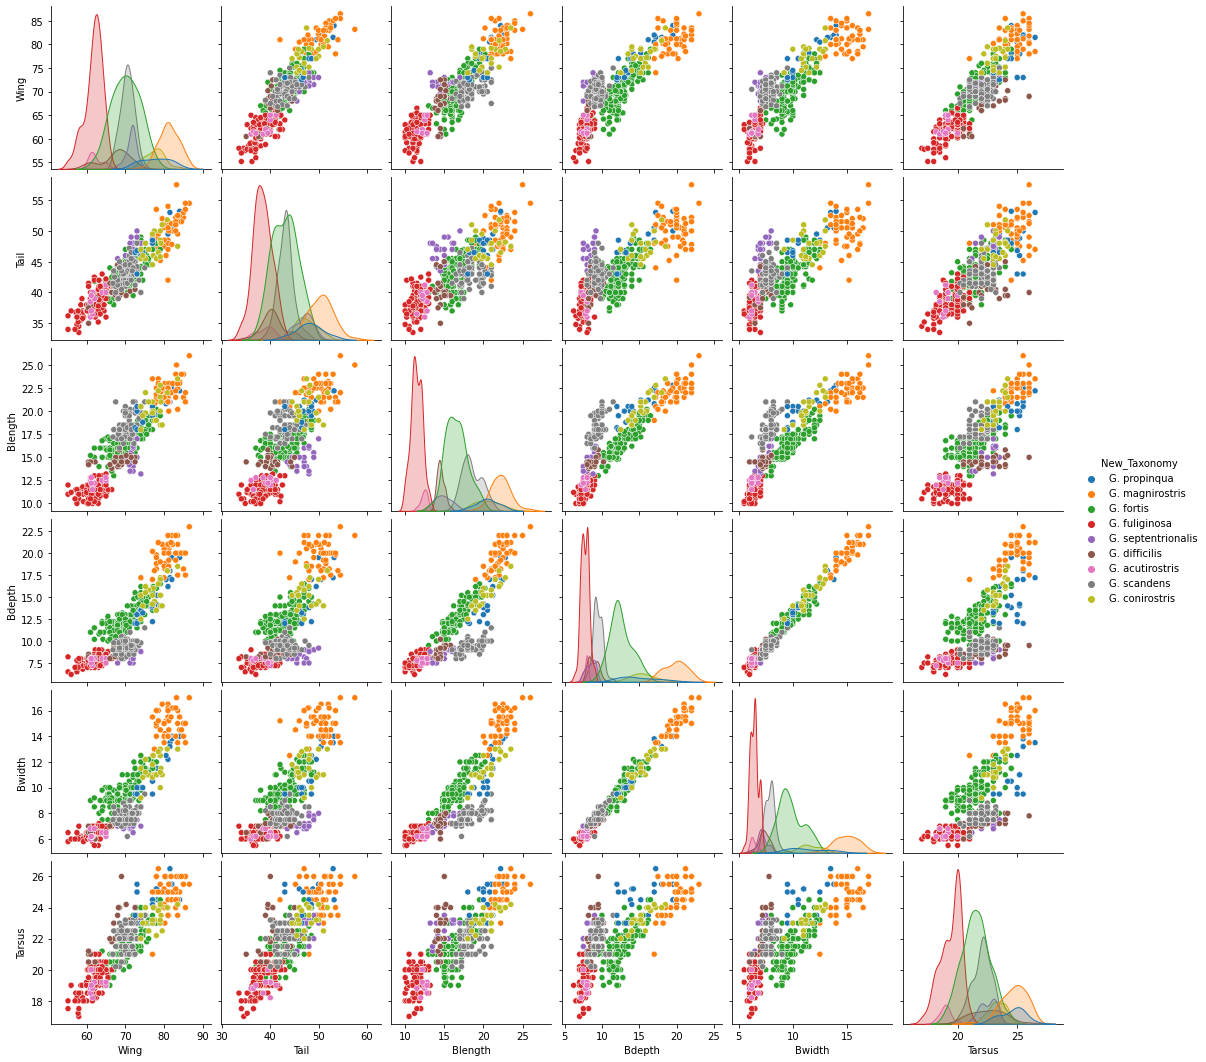

In [150]:
sns.pairplot(data=df,hue="New_Taxonomy")

These multi-panel plots brings us to the distinction between figures and axes in seaborn.  You will usually come across this as an error message when you try to treat a figure as an axes or vice versa.  

To see how this works let's look at the distribuiton of wing lengths in the finch data

<AxesSubplot:xlabel='Wing', ylabel='Count'>

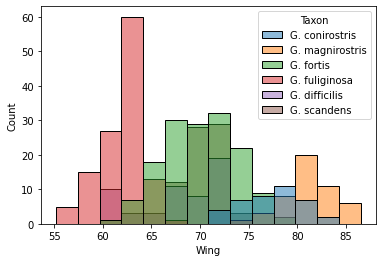

In [73]:
obj1 = sns.histplot(data=df, x="Wing", hue="Taxon")

histplot outputs a single pane which includes the legend in the plot.  This is an Axes

In [247]:
type(obj1)

matplotlib.axes._subplots.AxesSubplot

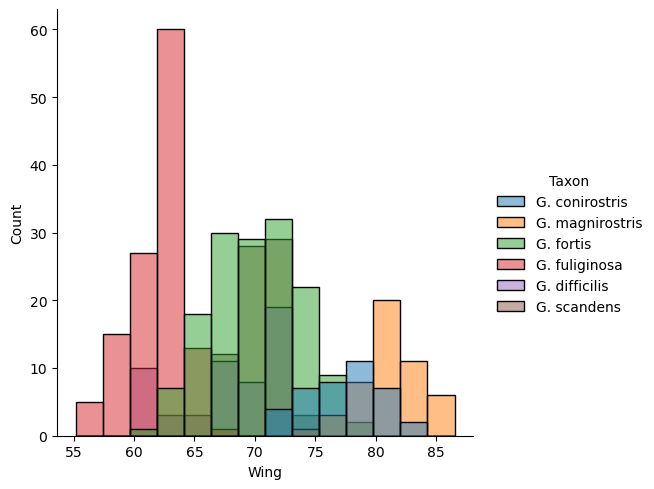

In [251]:
obj2 = sns.displot(data=df, x="Wing", hue="Taxon")

displot draws a figure made up of a FacetGrid with plots on it.

In [249]:
type(obj2)

seaborn.axisgrid.FacetGrid

In [ ]:
You can easily change the type of plot in the figure using 'kind'

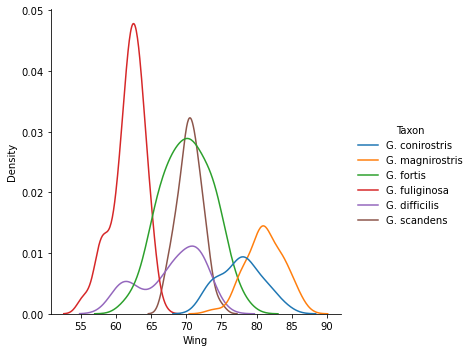

In [75]:
sns.displot(data=df, x="Wing", hue="Taxon", kind = 'kde')

and plot several graphs onto the facetgrid to make a compound figure using 'col' to specifiy what should be in the columns

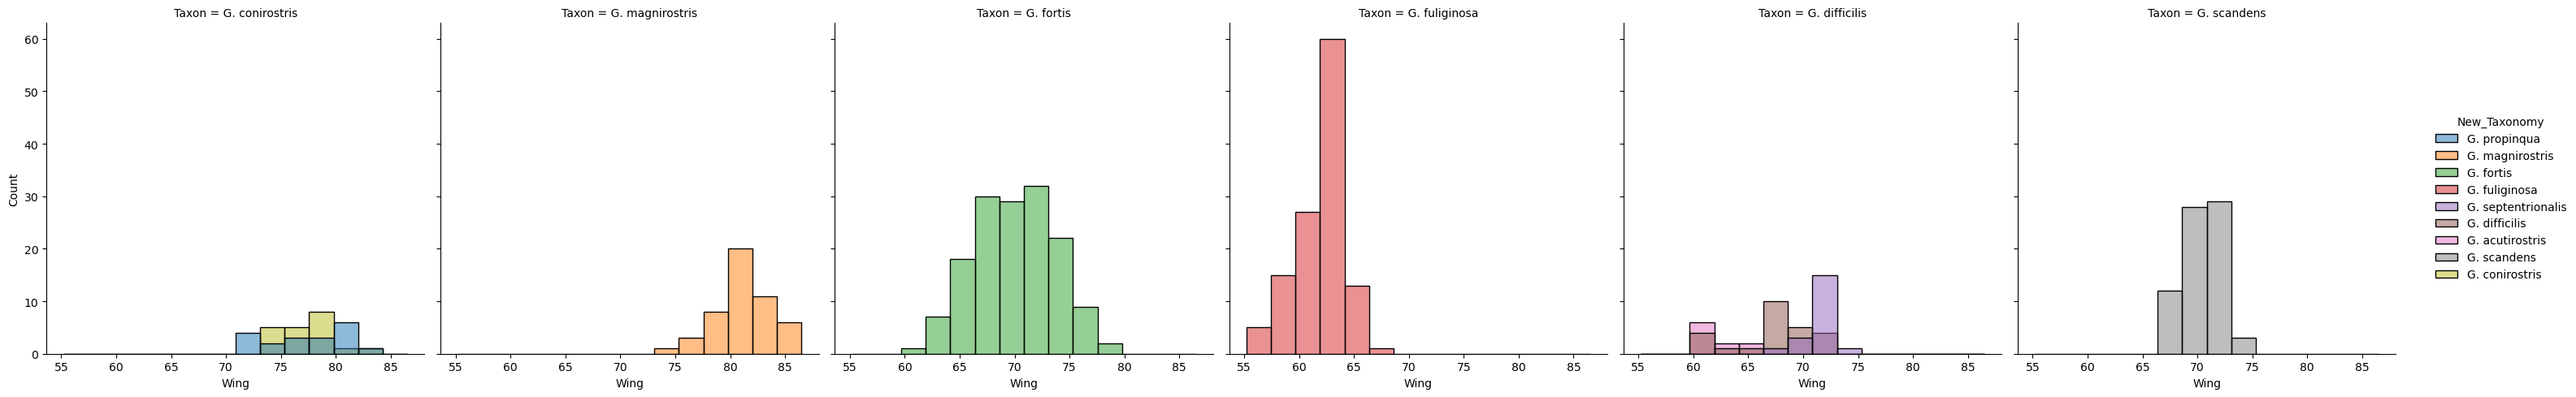

In [253]:
sns.displot(data=df, x="Wing", hue="New_Taxonomy", kind = "hist", col="Taxon")

In [ ]:
'row' to say what should be in the rows

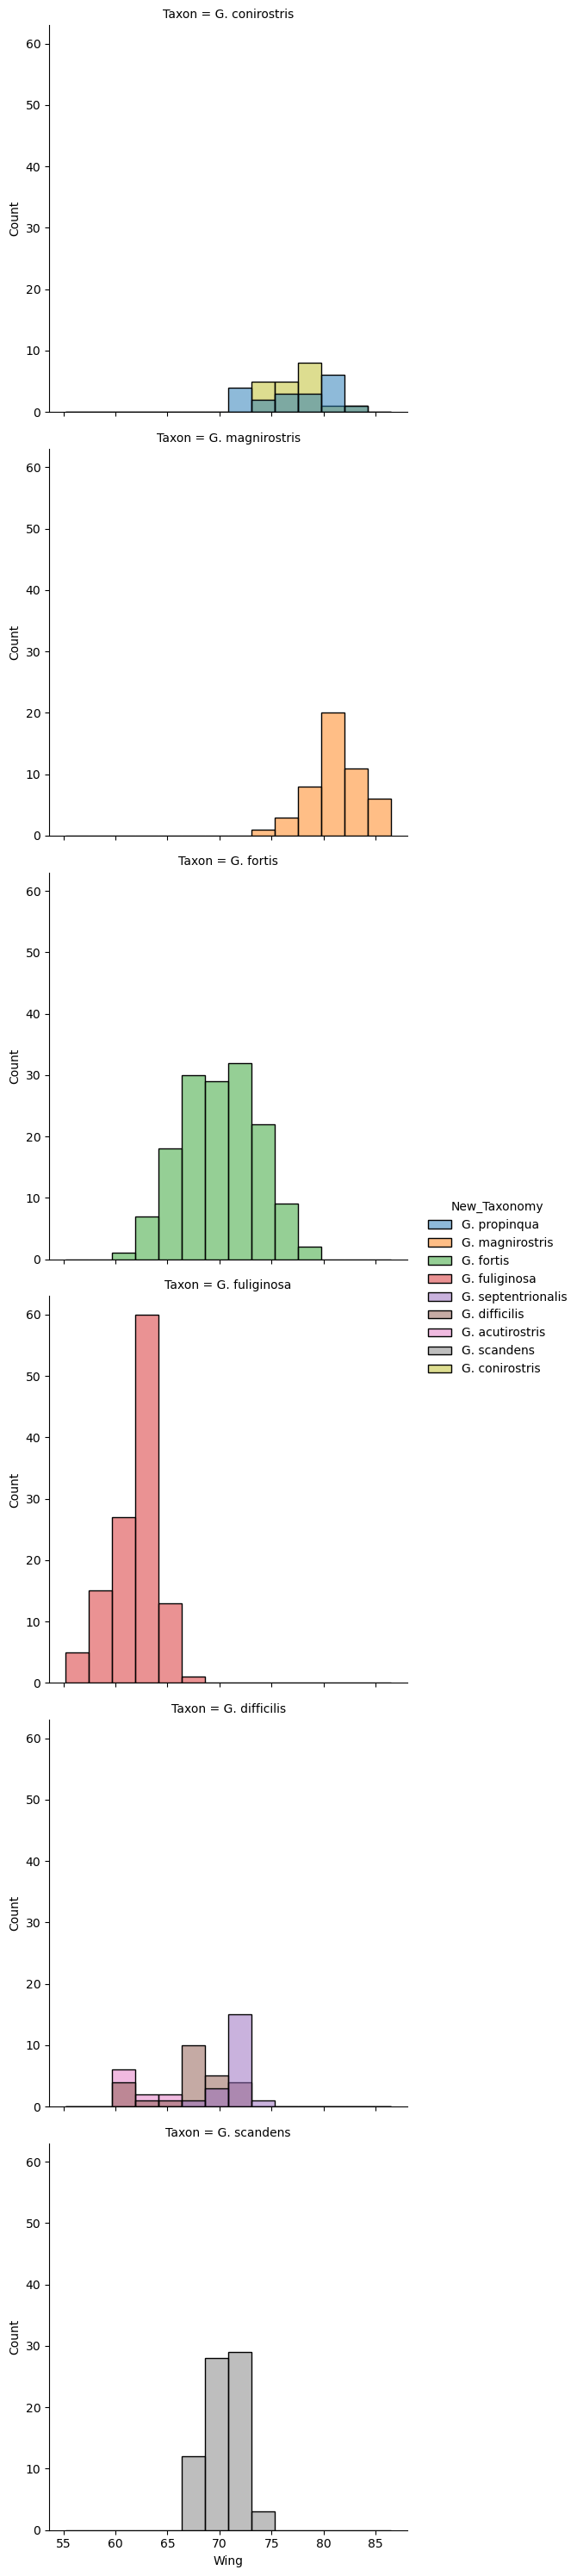

In [254]:
sns.displot(data=df, x="Wing", hue="New_Taxonomy", kind = "hist", row="Taxon")

In [ ]:
Wrapping the plots is slightly more complex and involves us building a FacetGrid and plotting the axes on it.

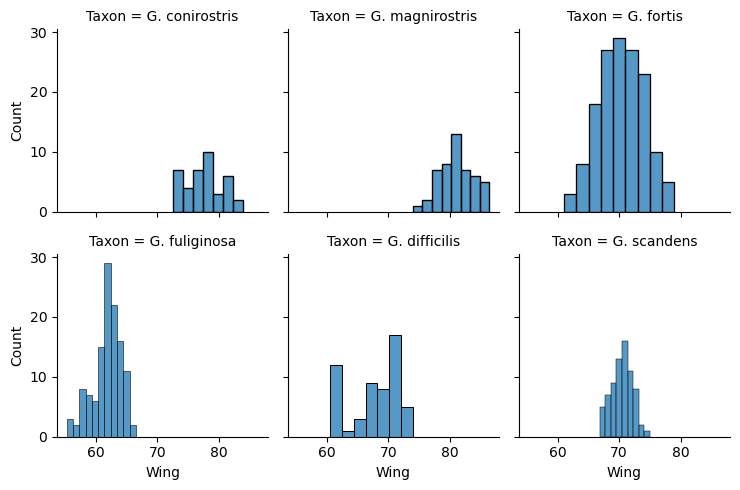

In [258]:
#build the FacetGrid
g = sns.FacetGrid(df, col="Taxon", height=2.5, col_wrap=3)
#Add the plots
g.map(sns.histplot, "Wing")

FacetGrid comands can be very flexible.  We can plot by one factor in rows and another in columns, here looking at wing lengths by species across all the islands.  

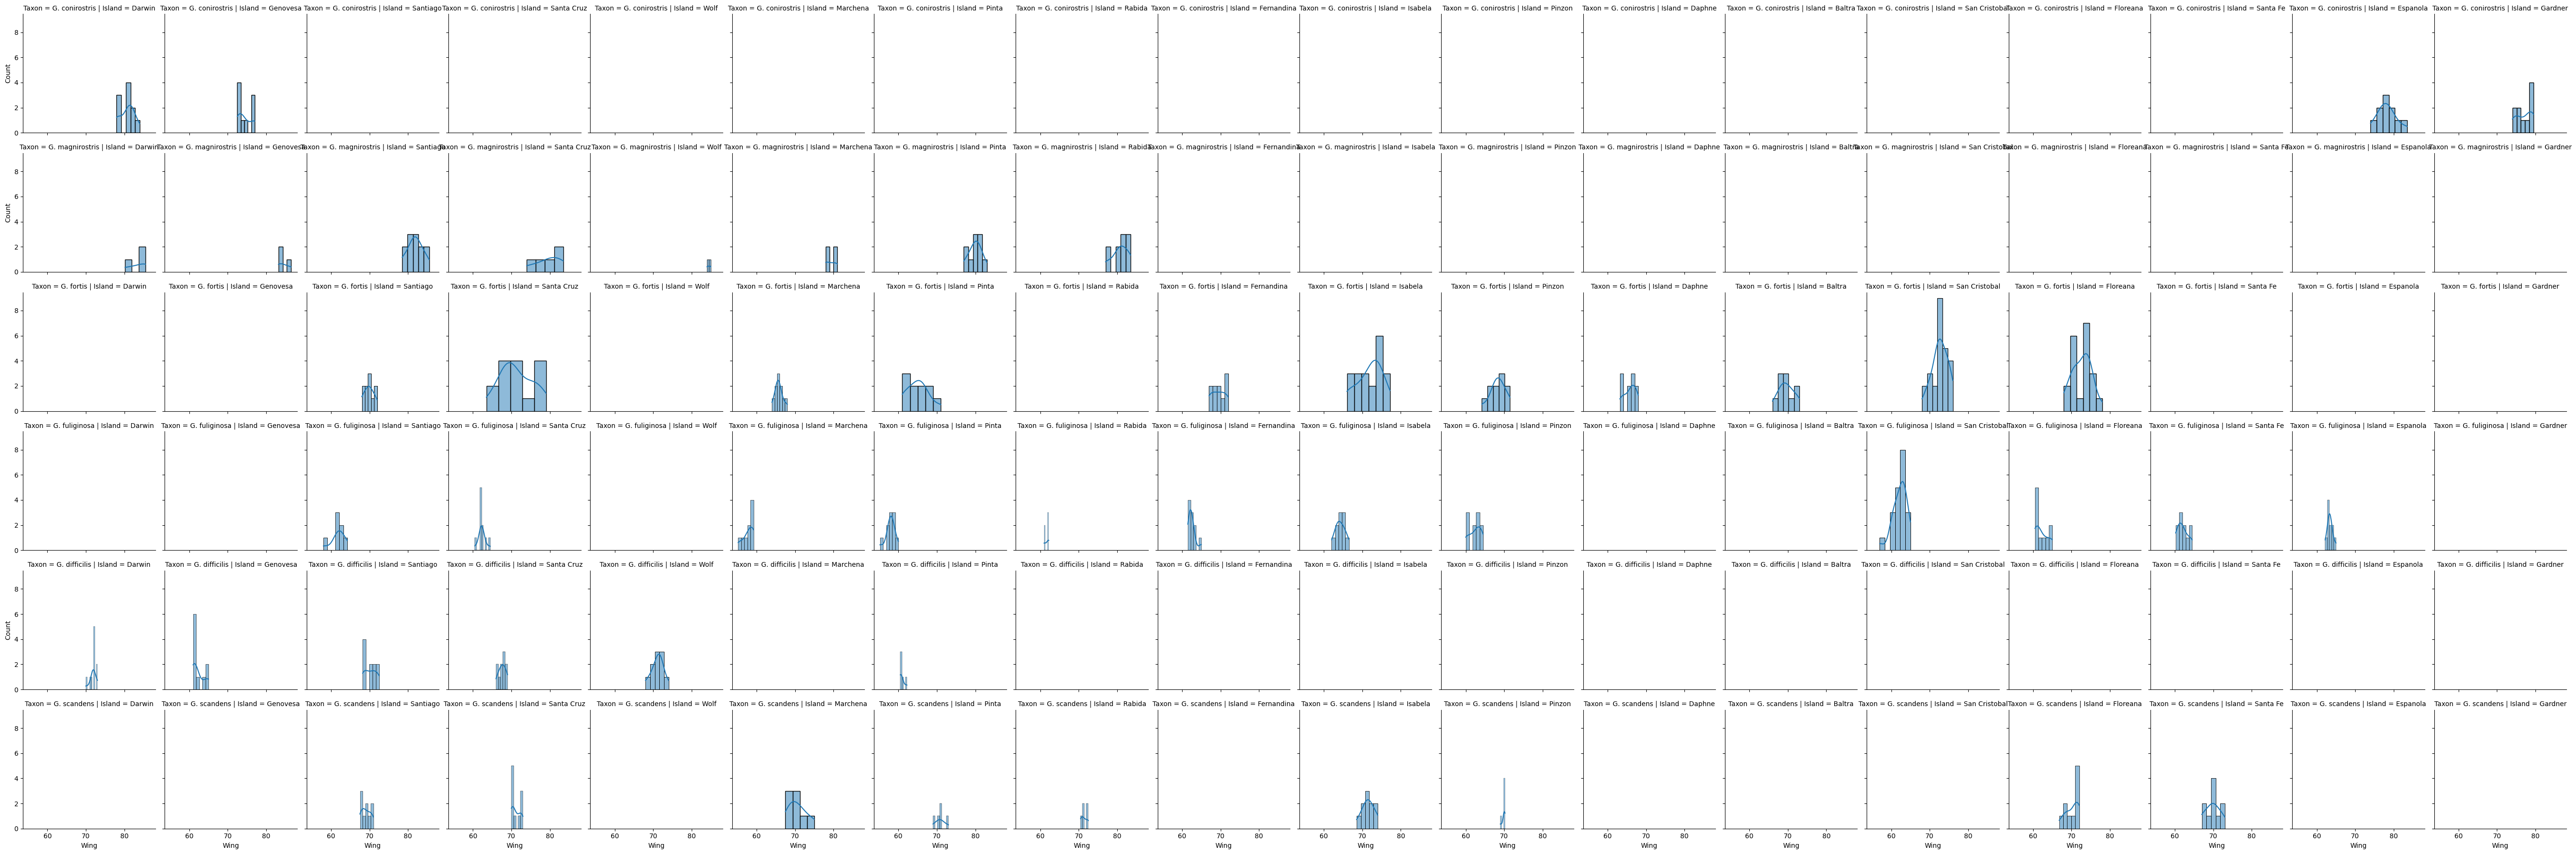

In [266]:
g = sns.FacetGrid(df, col="Island", row="Taxon")
g.map(sns.histplot, "Wing", kde=True)


In [ ]:
sns.displot(data=df, x="Wing", hue="New_Taxonomy", kind = "kde", col="Taxon")

Figure level functions are great for straightforward multiple plots, but if you want to combine a number of different types of plots into a single figure you need to assemble it from individual axes plots.

<AxesSubplot:xlabel='Wing', ylabel='Count'>

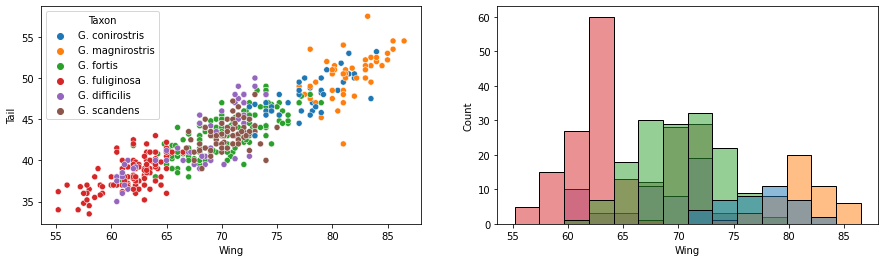

In [130]:
#Make figure f, of size 15 x 4 with two axes
f, axs = plt.subplots(1,2, figsize=(15, 4))
#scatterplot on axes 1 (zero-based)
sns.scatterplot(data=df, x="Wing", y="Tail", hue="Taxon", ax=axs[0])
#histogram on axes 2
sns.histplot(data=df, x="Wing", hue="Taxon", legend=False, ax=axs[1])

Seaborn's pairplot is one of its 'super' figure plots which combine two different types of plots.  These are great for getting a quick overview of your data.

jointplot combines a scatterplot and histograms of each variable.

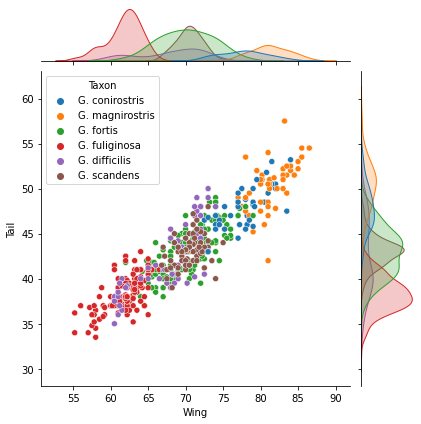

In [129]:
sns.jointplot(data=df, x="Wing", y="Tail", hue="Taxon")

pairplot plots all numeric columns against each other and provides histograms of the distributions.

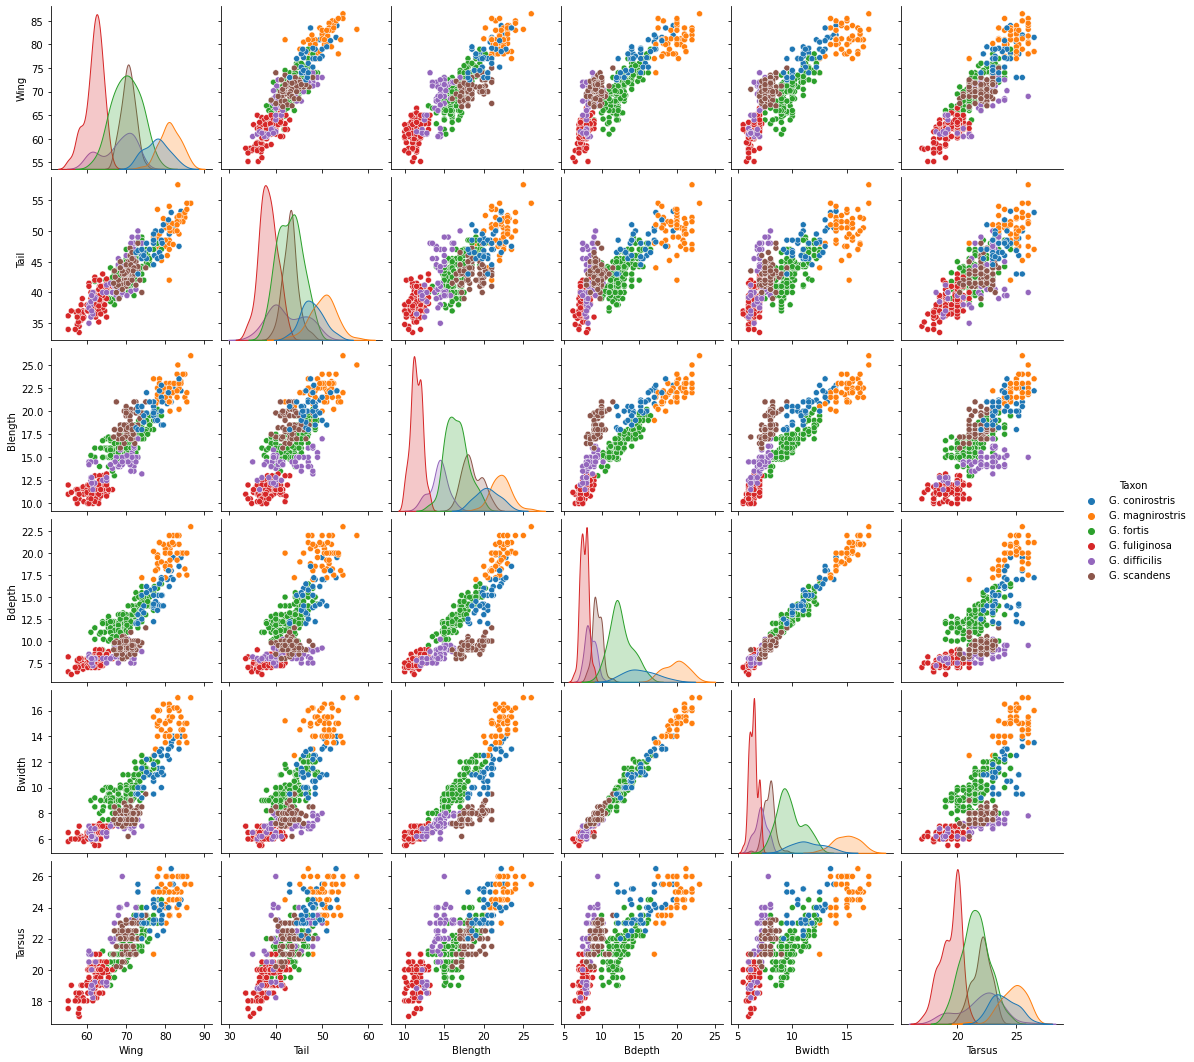

In [132]:
sns.pairplot(data=df,hue="Taxon")

### Changeing figure size

If you're using a seaborn function that draws a single plot, use matplotlib.pyplot.figure with the figsize keyword  
If you're using a seaborn function that draws multiple plots, use the height and aspect keyword arguments

In [238]:
sns.reset_defaults()

Histogram of Wing length

<AxesSubplot:xlabel='Wing', ylabel='Count'>

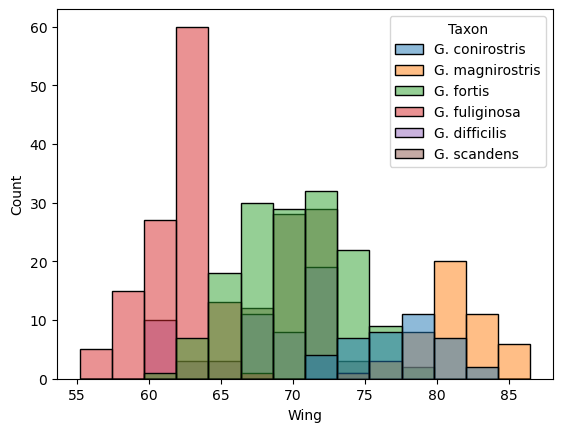

In [239]:
sns.histplot(data=df, x="Wing", hue="Taxon")

<AxesSubplot:xlabel='Wing', ylabel='Count'>

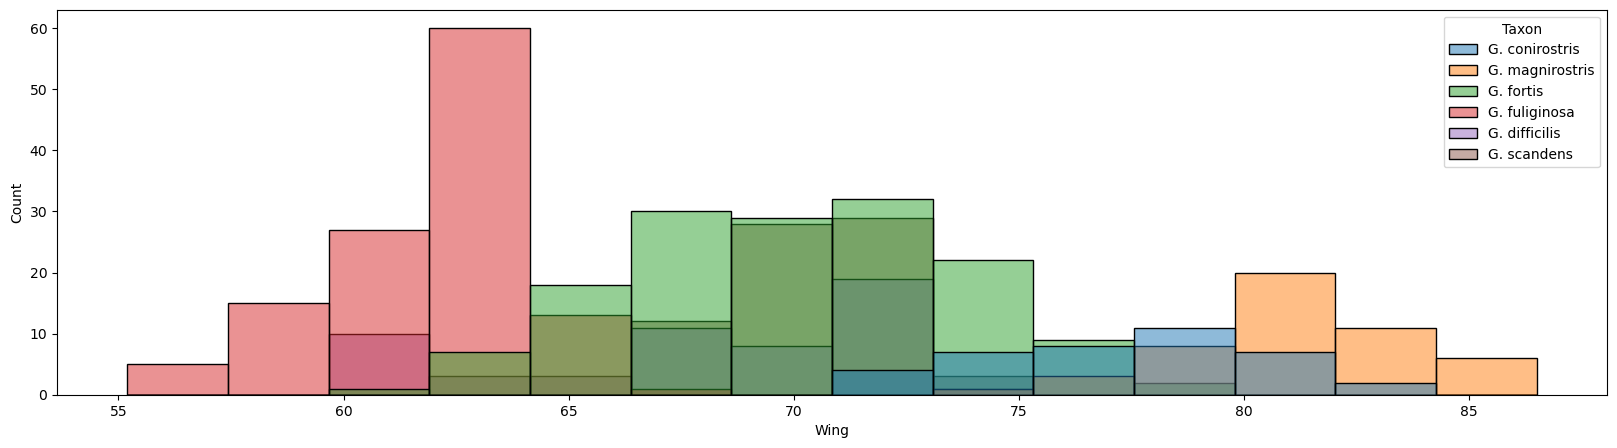

In [241]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x="Wing", hue="Taxon")

But only is unsing axes plots, not figure plots.  Matplotlib settings refer to an axes, not the full figure produced by seaborn figure plots

<Figure size 2000x500 with 0 Axes>

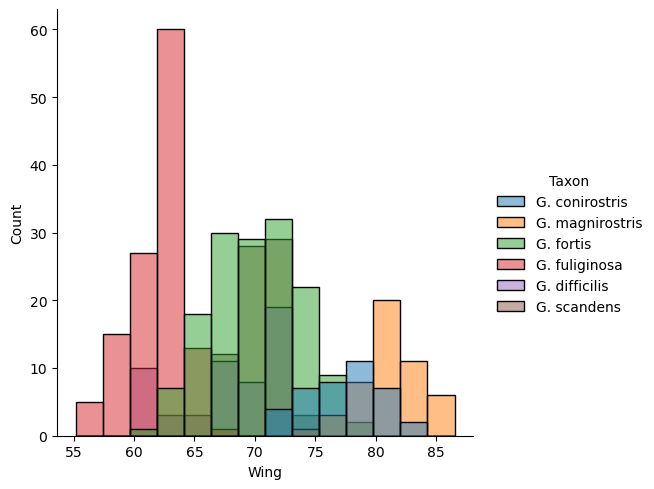

In [242]:
plt.figure(figsize=(20,5))
sns.displot(data=df, x="Wing", hue="Taxon")

To change size on a seaborn figure we use its internal settings height and aspect (the ratio between hieght and width) to control the size of each subplot wihtin  the figure.

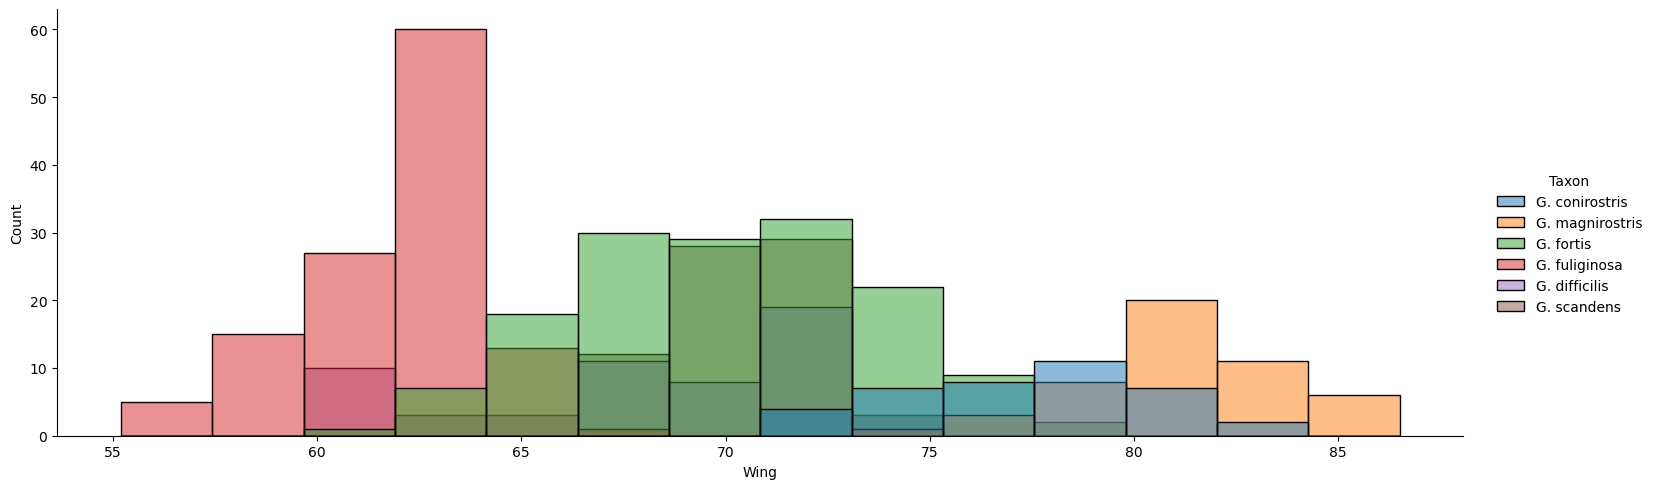

In [243]:
sns.displot(data=df, x="Wing", hue="Taxon", height=5, aspect=3)

Similarily, for changing axes lables ther are differnt appraoches to doing this for axes plots adn Figure (FacetGrids).  https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
    

To get back to the issue of how the old and new taxonomies differ.  It would be useful to plot the morphological metrics by one taxonomy and colour by annother

We can compare the distribution of wing sizes in each taxonomy using displot

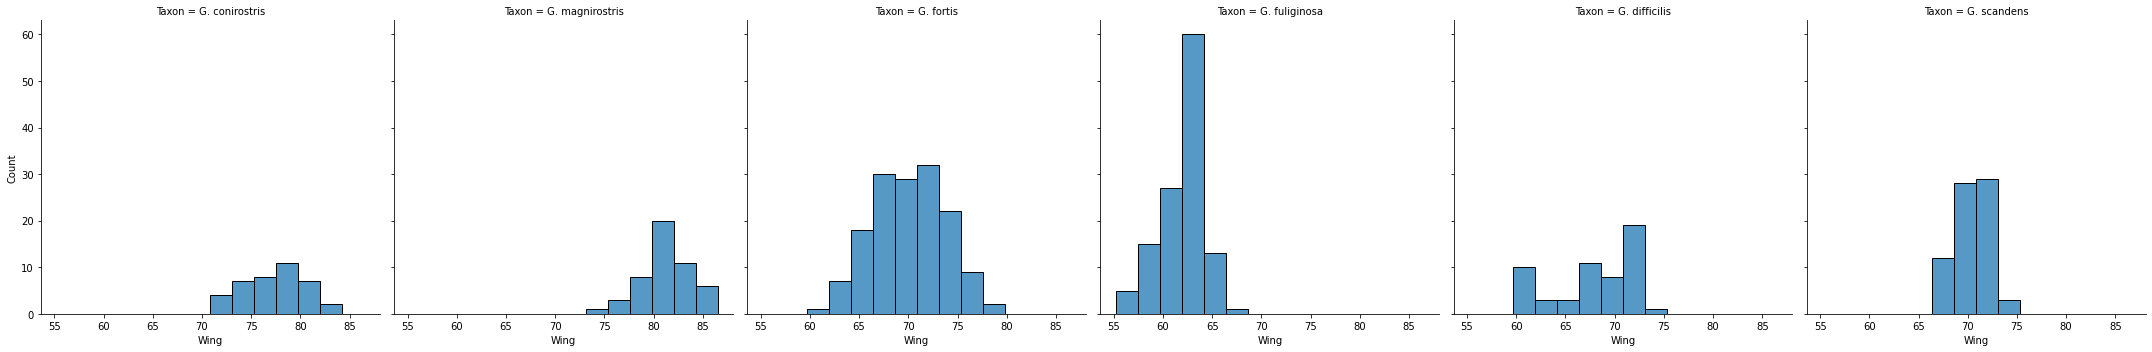

In [8]:
sns.displot(data=df, x="Wing", col="Taxon")

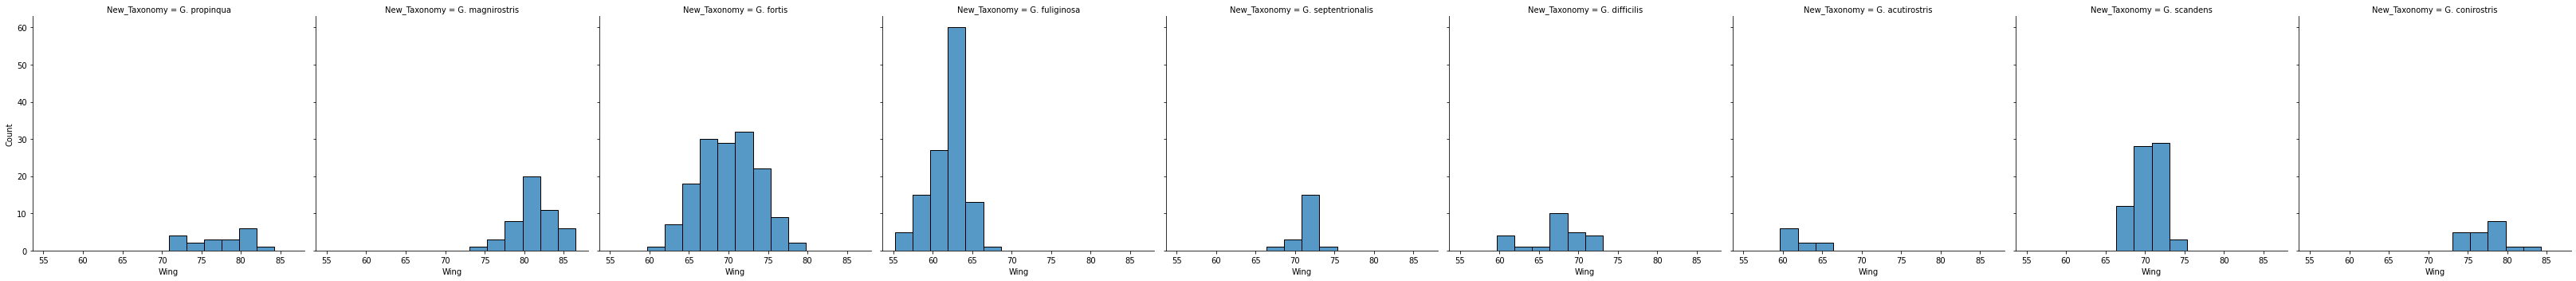

In [9]:
sns.displot(data=df, x="Wing", col="New_Taxonomy")

But comparing the data might be easier with catplot

/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


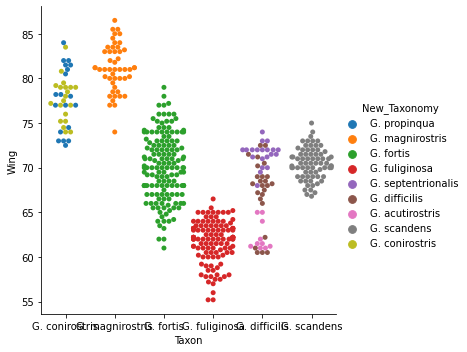

In [11]:
sns.catplot(data=df, kind="swarm", x="Taxon", y="Wing", hue="New_Taxonomy")

Let's make that a better plot.  As suggested we will decrease the size of the marker and we also need to rotate the x labels.  We should also make the species names italic.
's' sets the marker size (default is 5). 


As this is a single plot, to change the x axis labels we use matplotlib

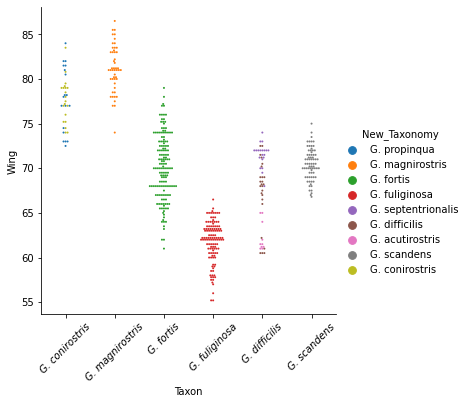

In [158]:
chart = sns.catplot(data=df, kind = "swarm", x="Taxon", y="Wing", hue="New_Taxonomy", s = 2)
plt.xticks(rotation=45, style='italic')
chart

these markers are too small to see the colours well.  Better to increase the size of the plot?  In the introdcution this week we used fig.set_size_inches(6, 6) to change the figure size of a matplotlib plot, but that won't work here as this is a figure, not an axes.  We can specify the size of the fiigure produced by catplot in the plotting command.

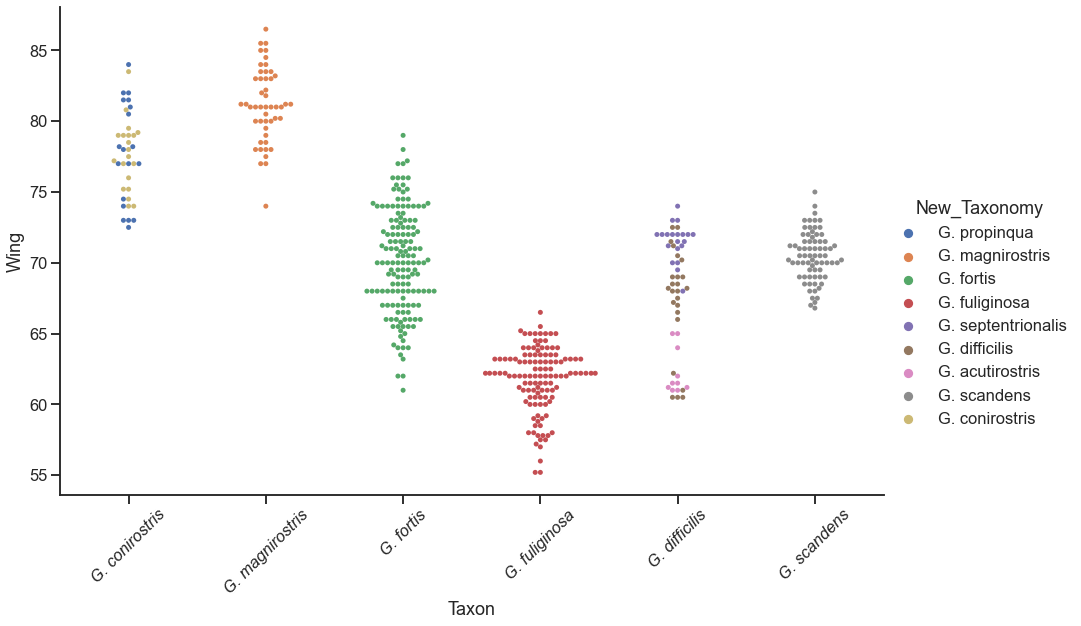

In [170]:
chart = sns.catplot(data=df, kind = "swarm", x="Taxon", y="Wing", hue="New_Taxonomy", s = 5, height=8, aspect=8/5)
plt.xticks(rotation=45, style='italic')
chart

We can see here that G. conirostris has been split into two species that do not differ in their Wing length much, and G. difficilis has been split into 3 with long, short and variable wing lengths.  It would be good to see this distribution for all the morphological measurements.  We could plot each graph independantly or we can re-arrange the data into long form and make a single figure (see class 2 for how we did this)

In [172]:
df.head(3)

Taxon       Institution Museum No.  Island       Taxon-Island  \
0  G. conirostris  Rotheschild Mus.     1916.0  Darwin  conirostrisDarwin   
1  G. conirostris  Rotheschild Mus.     1918.0  Darwin  conirostrisDarwin   
2  G. conirostris  Rotheschild Mus.     1931.0  Darwin  conirostrisDarwin   

   New_Taxonomy New_Taxonomy_Island   Sex  Wing  Tail  Blength  Bdepth  \
0  G. propinqua     propinquaDarwin  Male  78.2  46.0     19.5    14.0   
1  G. propinqua     propinquaDarwin  Male  81.5  53.0     22.2    17.2   
2  G. propinqua     propinquaDarwin  Male  81.0  49.5     21.2    16.2   

   Bwidth  Tarsus  
0    11.0    25.2  
1    13.5    26.5  
2    12.2    23.5

In [173]:
df.columns

Index(['Taxon', 'Institution', 'Museum No.', 'Island', 'Taxon-Island',
       'New_Taxonomy', 'New_Taxonomy_Island', 'Sex', 'Wing', 'Tail', 'Blength',
       'Bdepth', 'Bwidth', 'Tarsus'],
      dtype='object')

In [174]:
Set_variables = ['Taxon', 'Island', 'New_Taxonomy']
Value_variables = ['Wing', 'Tail', 'Blength','Bdepth', 'Bwidth', 'Tarsus']
df2 = pd.melt(df, id_vars=Set_variables, value_vars=Value_variables, var_name='Morphology', value_name='mm')
df2.head(3)

Taxon  Island  New_Taxonomy Morphology    mm
0  G. conirostris  Darwin  G. propinqua       Wing  78.2
1  G. conirostris  Darwin  G. propinqua       Wing  81.5
2  G. conirostris  Darwin  G. propinqua       Wing  81.0

/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


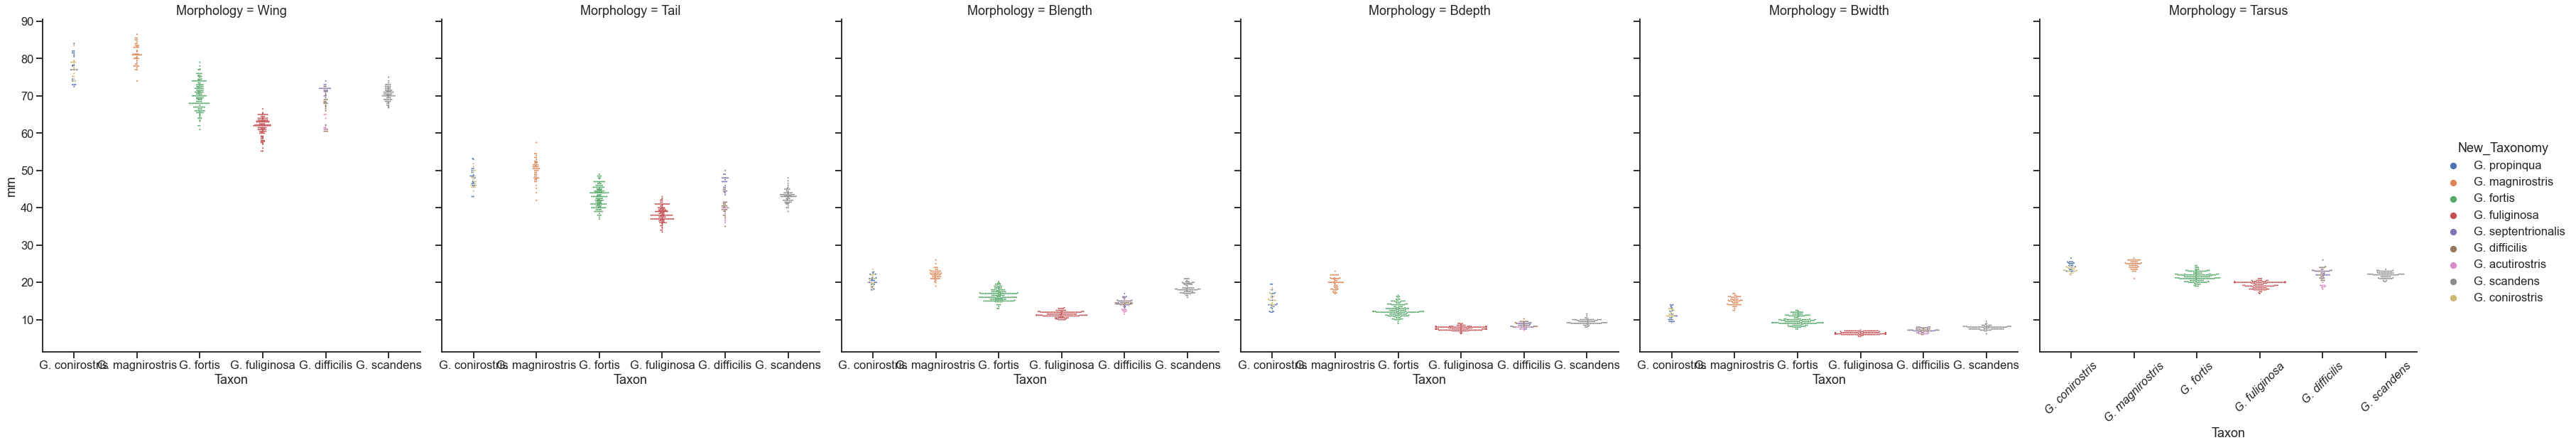

In [196]:
chart = sns.catplot(data=df2, kind = "swarm", x="Taxon", y="mm", hue="New_Taxonomy", s = 2, height = 8, col='Morphology', sharex='col')
plt.xticks(rotation=45, style='italic')
chart

We can make this clearer by only plotting the species which have changed in the new taxonomy

In [203]:
df3 = df2[(df2["Taxon"]=="G. conirostris") | (df2["Taxon"]=="G. difficilis")]

Now we have multiple plots ona a line we need to set the rotation for the while figure, not just the mtplotlib axes.

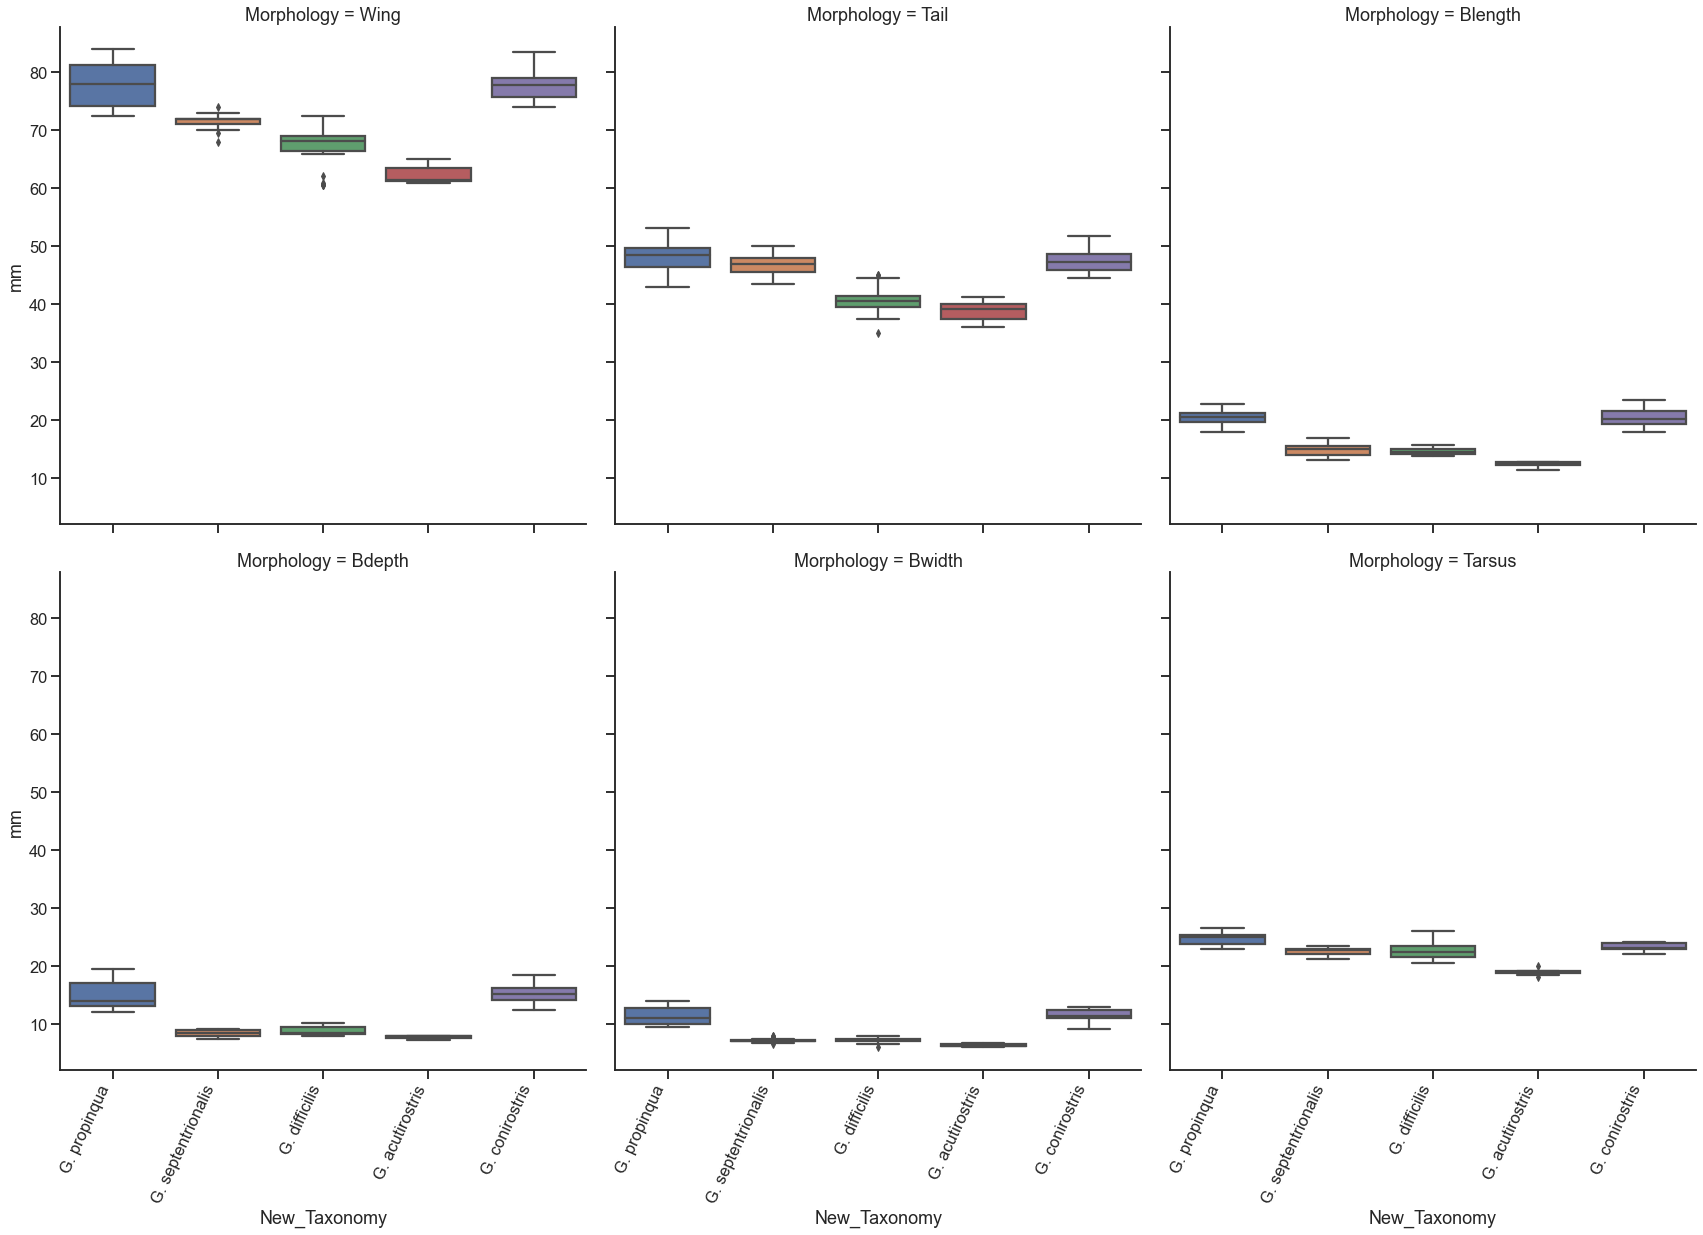

In [210]:
chart = sns.catplot(data=df3, kind = "box", x="New_Taxonomy", y="mm", height = 8, col='Morphology', col_wrap=3)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart

Would be better to have a separte y axes for each measurement.  This can be set with "sharey=False"

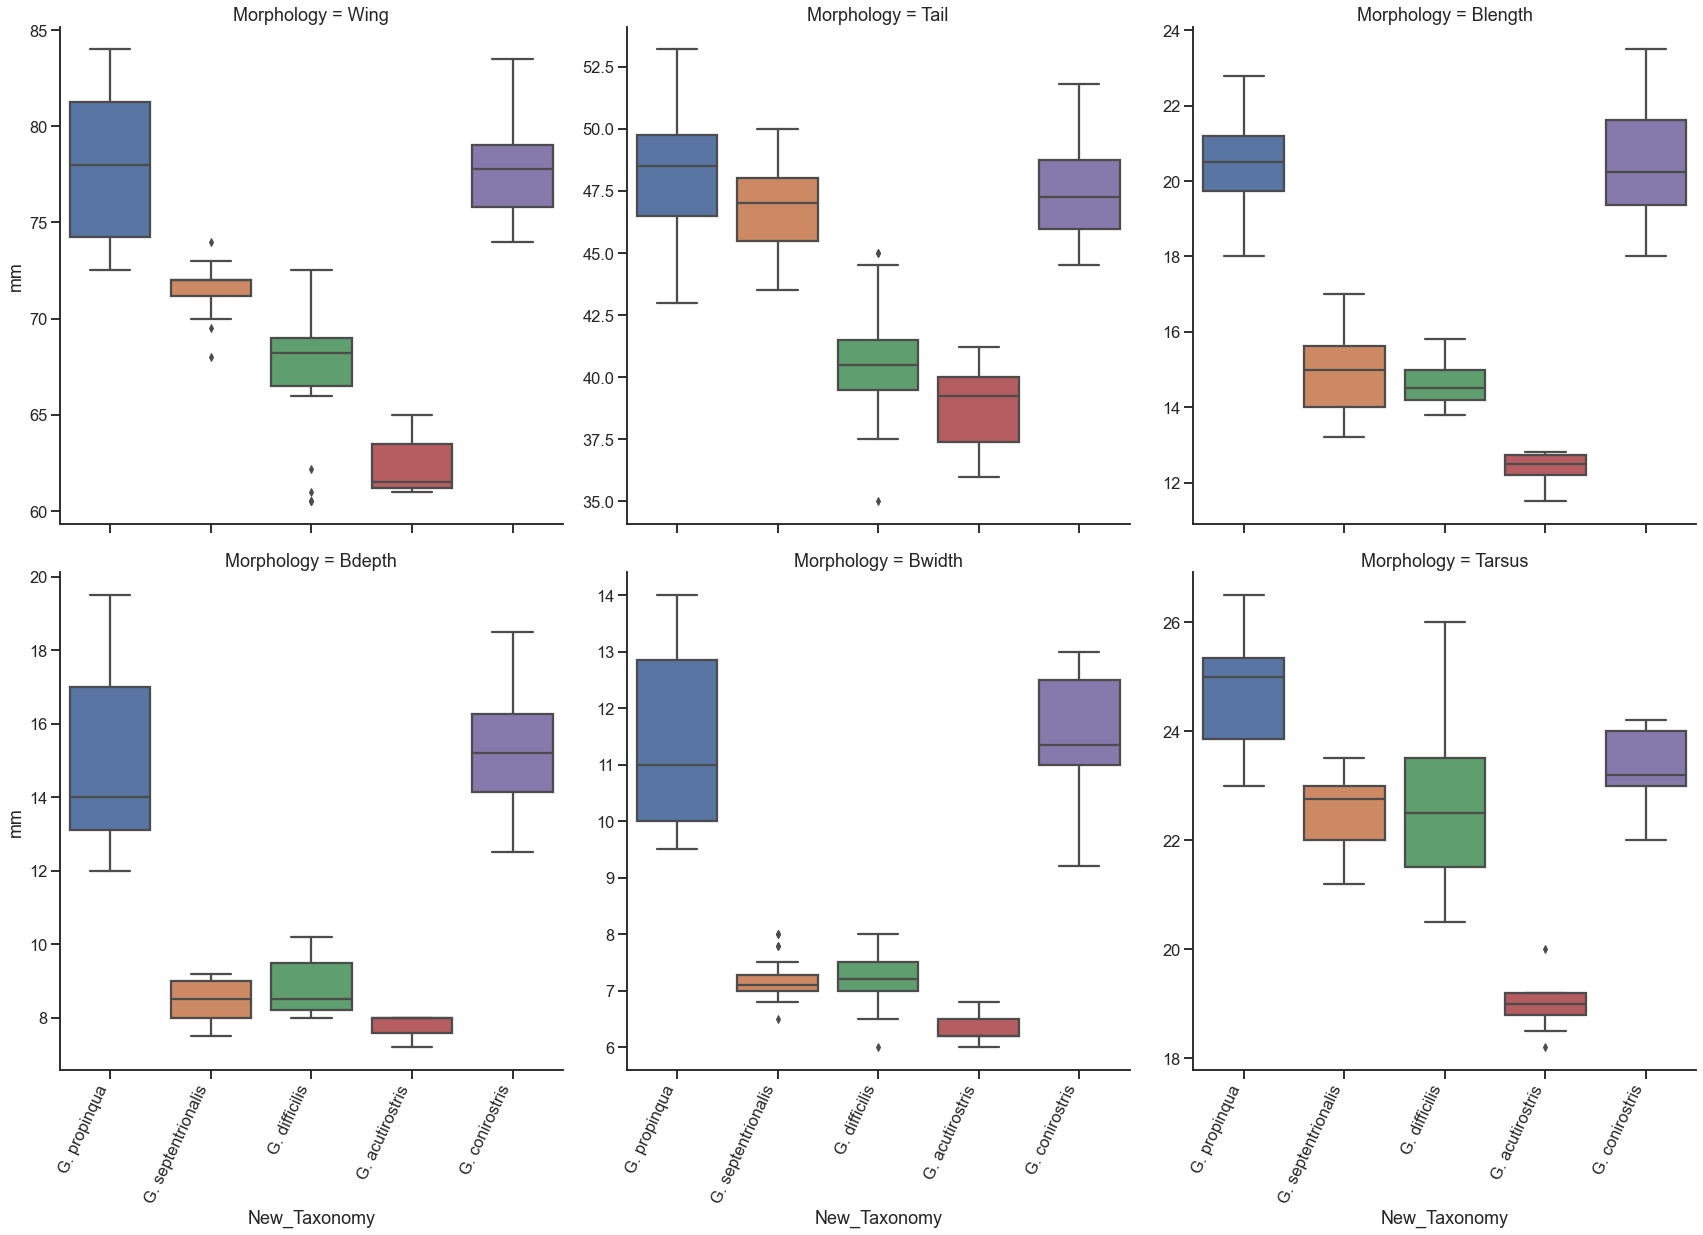

In [211]:
chart = sns.catplot(data=df3, kind = "box", x="New_Taxonomy", y="mm", height = 8, col='Morphology', col_wrap=3, sharey=False)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart

It would also be great to order the species so species which used to be one are side by side and are the same colour.

In [212]:
df3['New_Taxonomy'].unique()

array(['G. propinqua', 'G. septentrionalis', 'G. difficilis',
       'G. acutirostris', 'G. conirostris'], dtype=object)

In [ ]:
'G. propinqua' and 'G. conirostris' used to be one  
'G. septentrionalis', 'G. difficilis', 'G. acutirostris' used to be one  

In [214]:
col_ord = ['G. propinqua', 'G. conirostris','G. septentrionalis', 'G. difficilis', 'G. acutirostris']

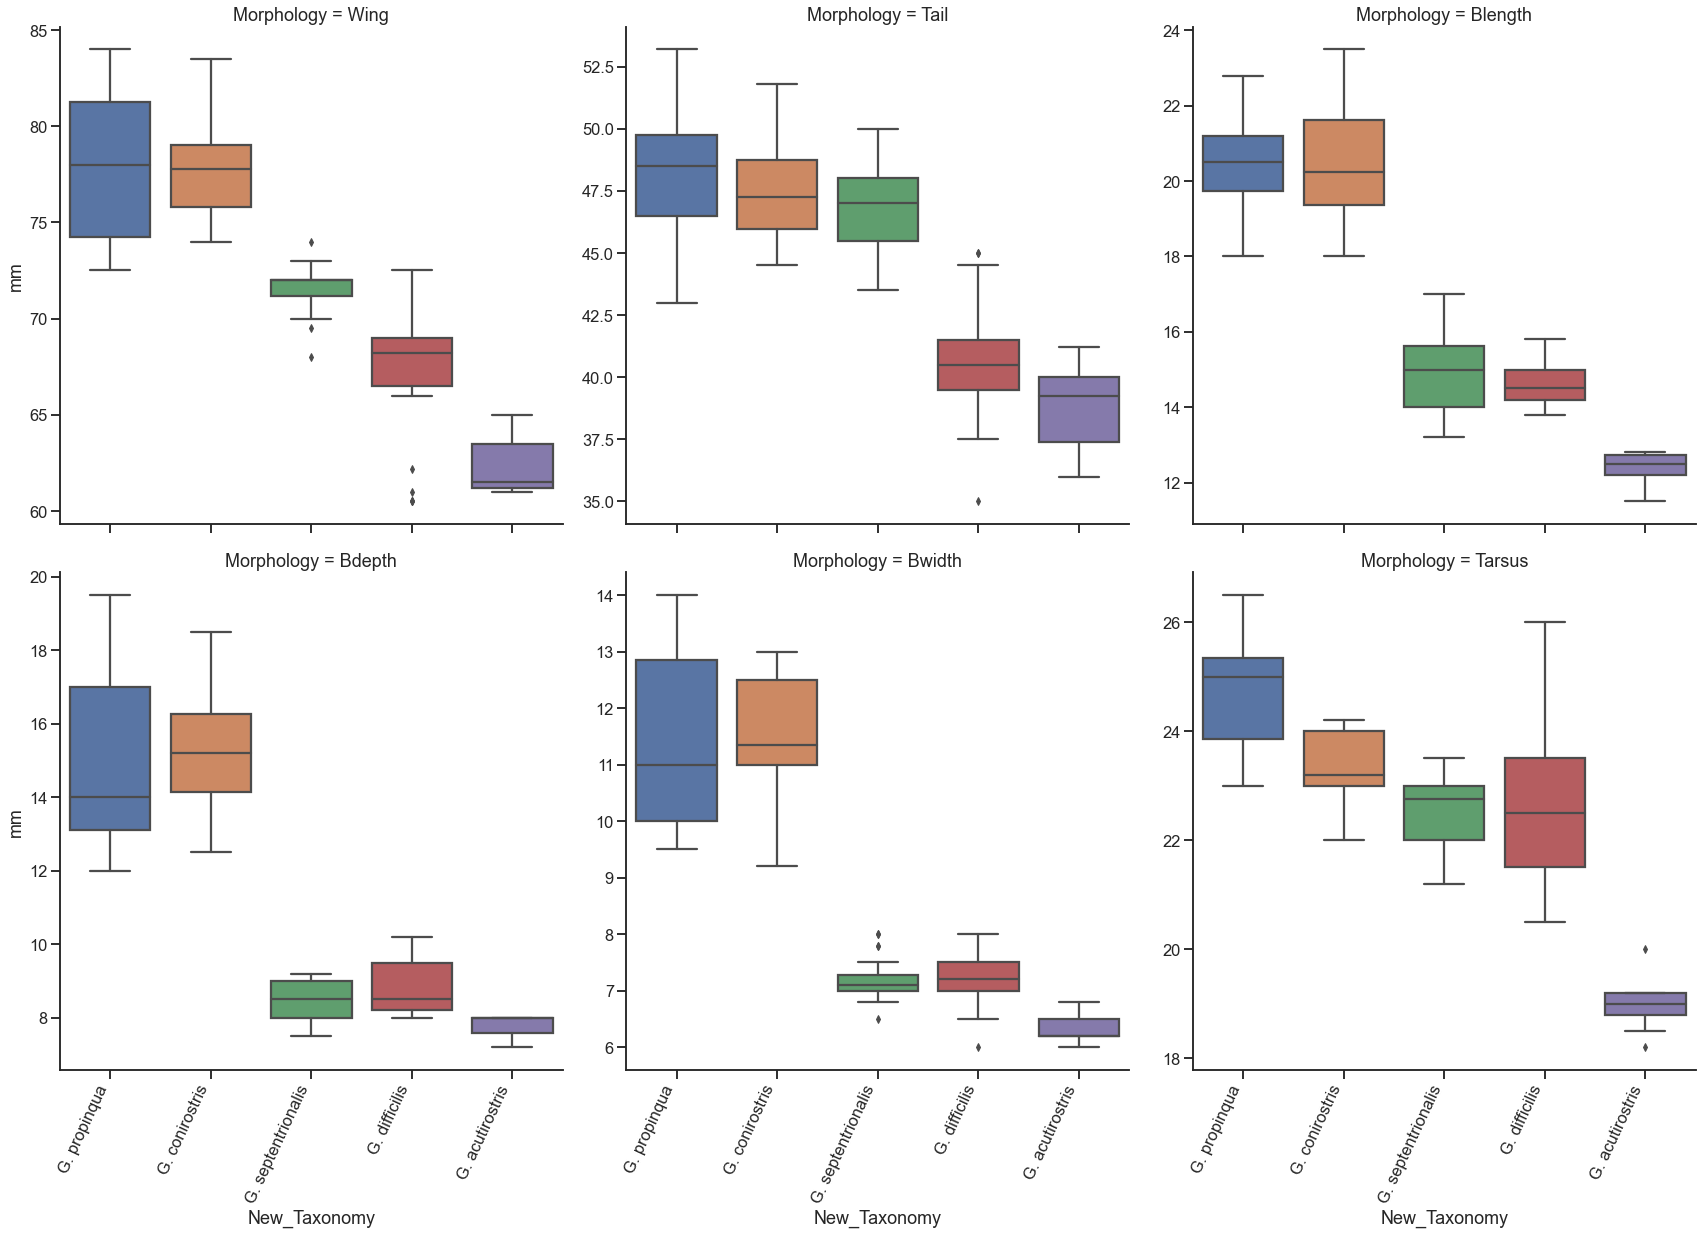

In [215]:
chart = sns.catplot(data=df3, kind = "box", x="New_Taxonomy", y="mm", height = 8, col='Morphology', col_wrap=3, sharey=False,  order=col_ord)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart

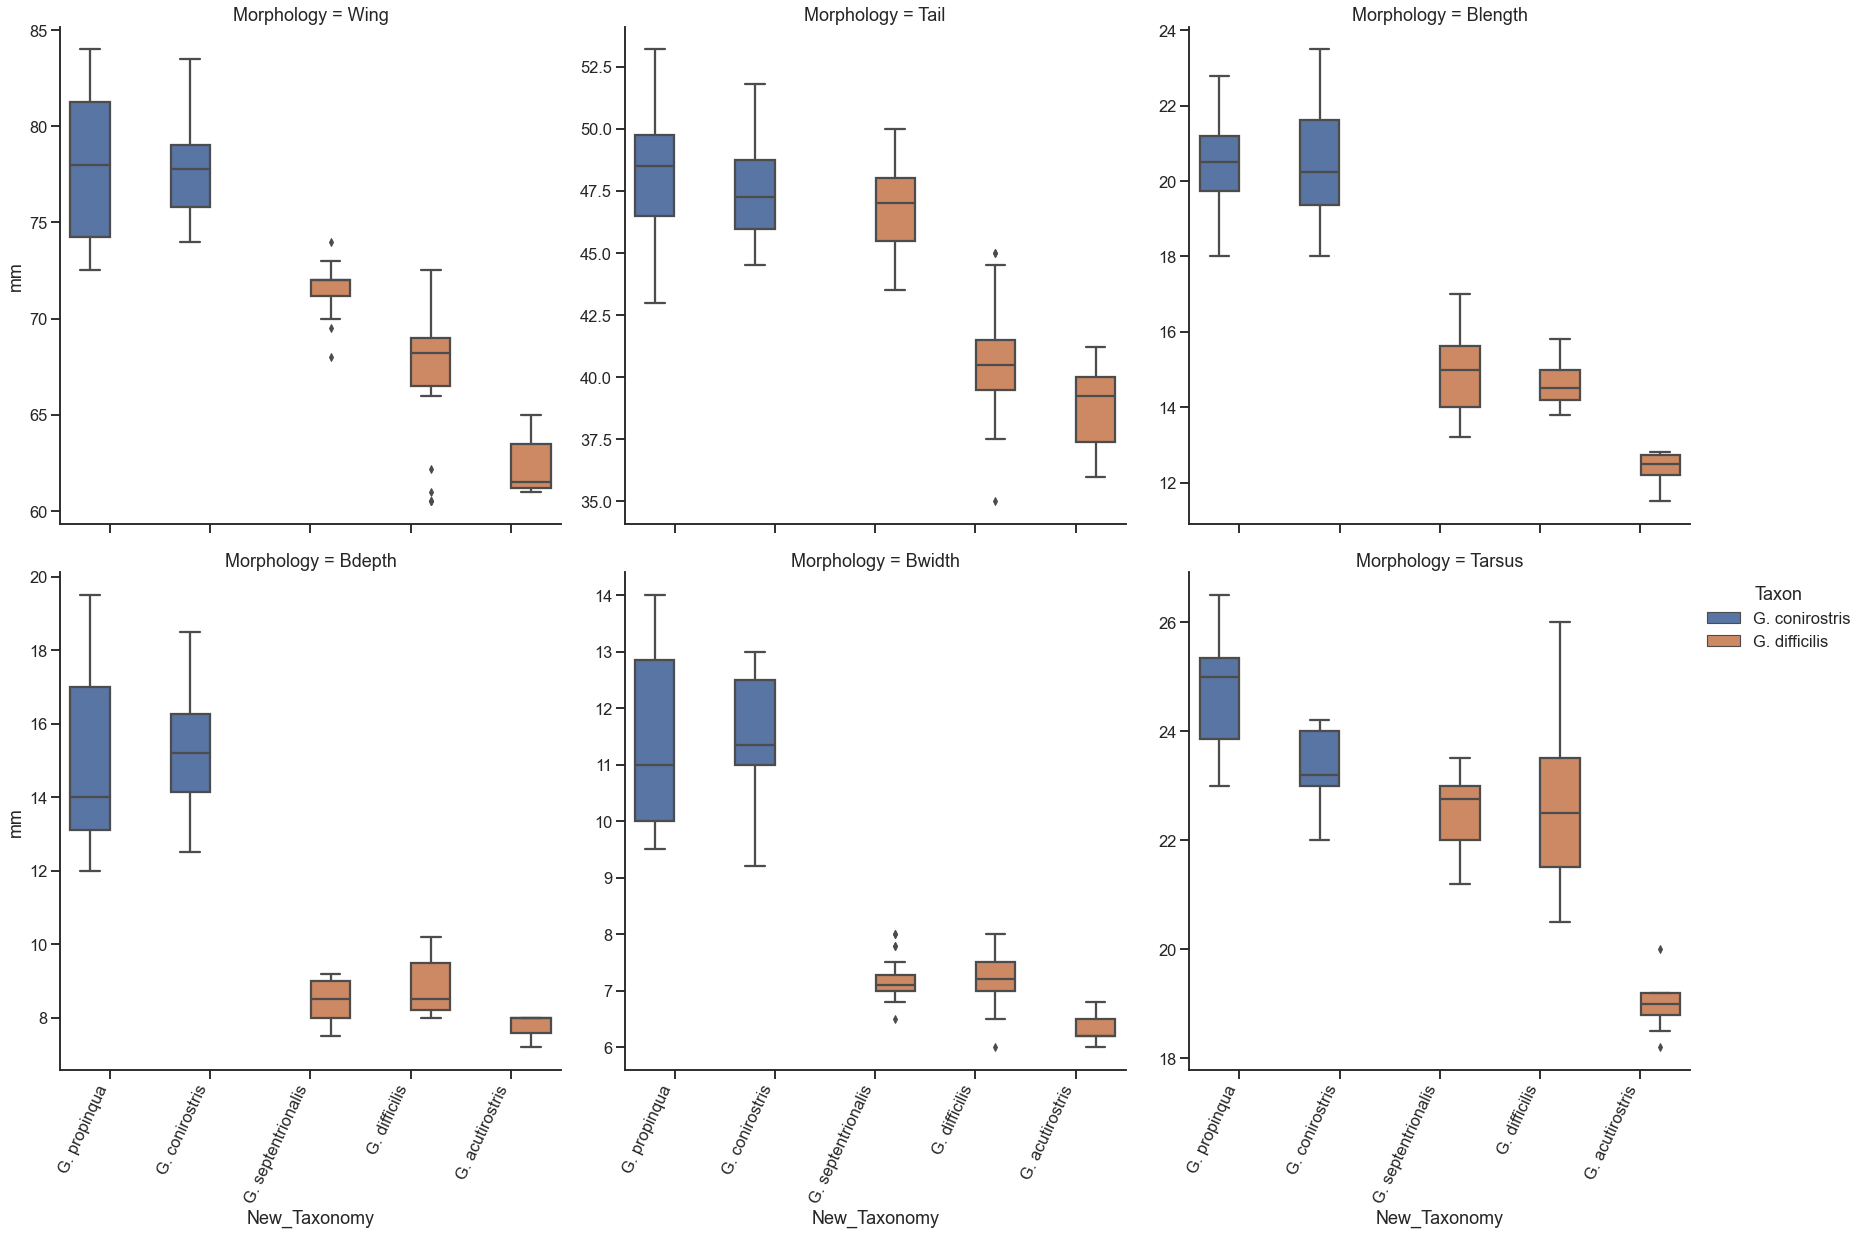

In [220]:
chart = sns.catplot(data=df3, kind = "box", x="New_Taxonomy", y="mm", height = 8, col='Morphology', col_wrap=3, sharey=False,  order=col_ord, hue="Taxon")
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart

better colours

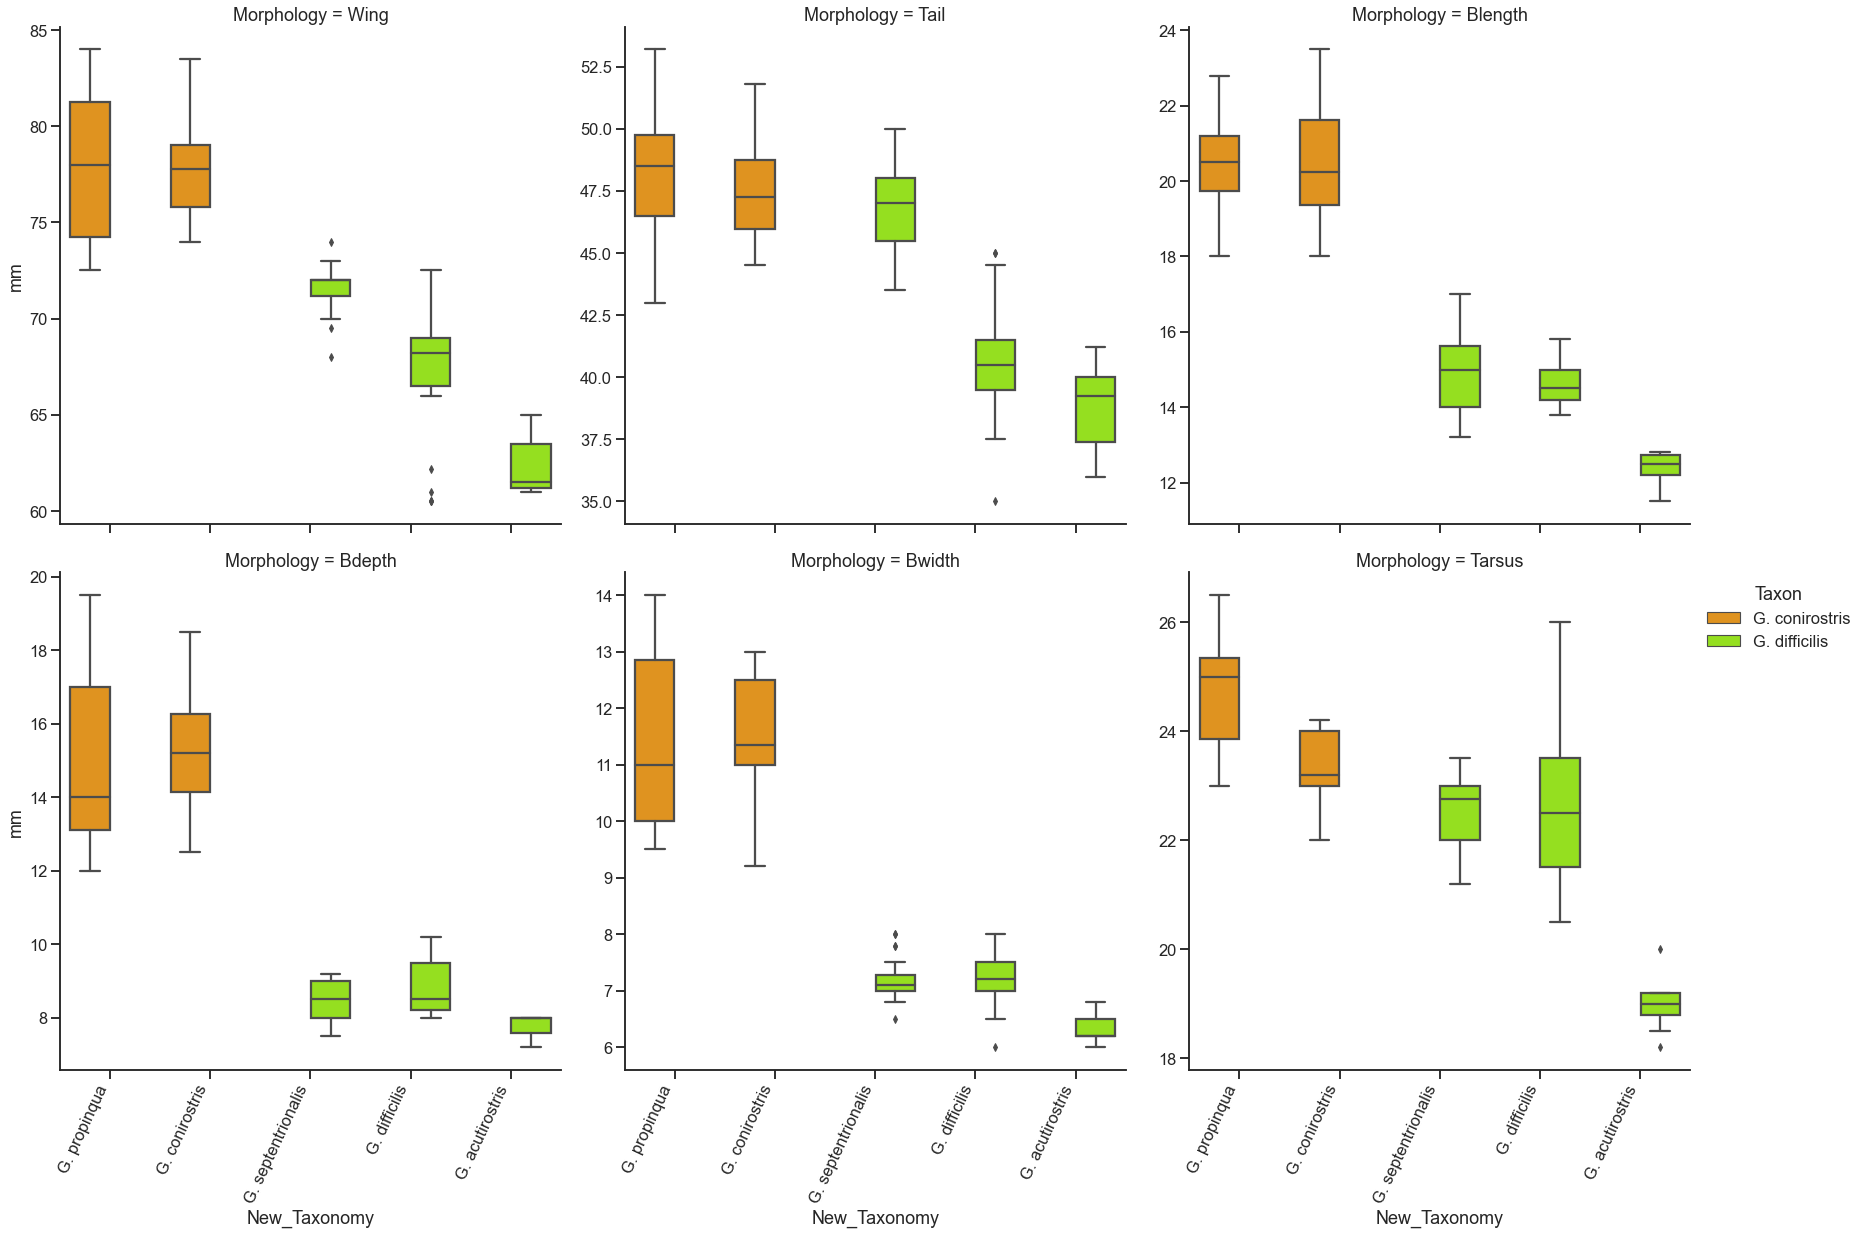

In [224]:
sns.set_palette("gist_rainbow")
chart = sns.catplot(data=df3, kind = "box", x="New_Taxonomy", y="mm", height = 8, col='Morphology', col_wrap=3, sharey=False,  order=col_ord, hue="Taxon")
chart.set_xticklabels(rotation=65, horizontalalignment='right')
chart

'G. propinqua' and 'G. conirostris' divide on Tarsus length, but not well.  
'G. septentrionalis', 'G. difficilis', 'G. acutirostris' divide on size in general, from large to small.

### Making a better plot.  


In [ ]:
Which plot to use?  
How to bring out the patterns in the data?

In [ ]:
How to change size, shape, style?  
Changing lable fonts, orientation, location

In [ ]:
Which colours to use? 
Hue, saturation, colour theory, continous colour gradients

In [ ]:
### Saving plots for further manipulation

Seaborn can't do everyting.  Sometimes you need to further tweak a plot in another program.  You can export seaborn plot as a .png (big files, transparaency possible), .jpg (smaller files but lossy, no transparency) but the most flexible for futher editing is a vector format like .svg.

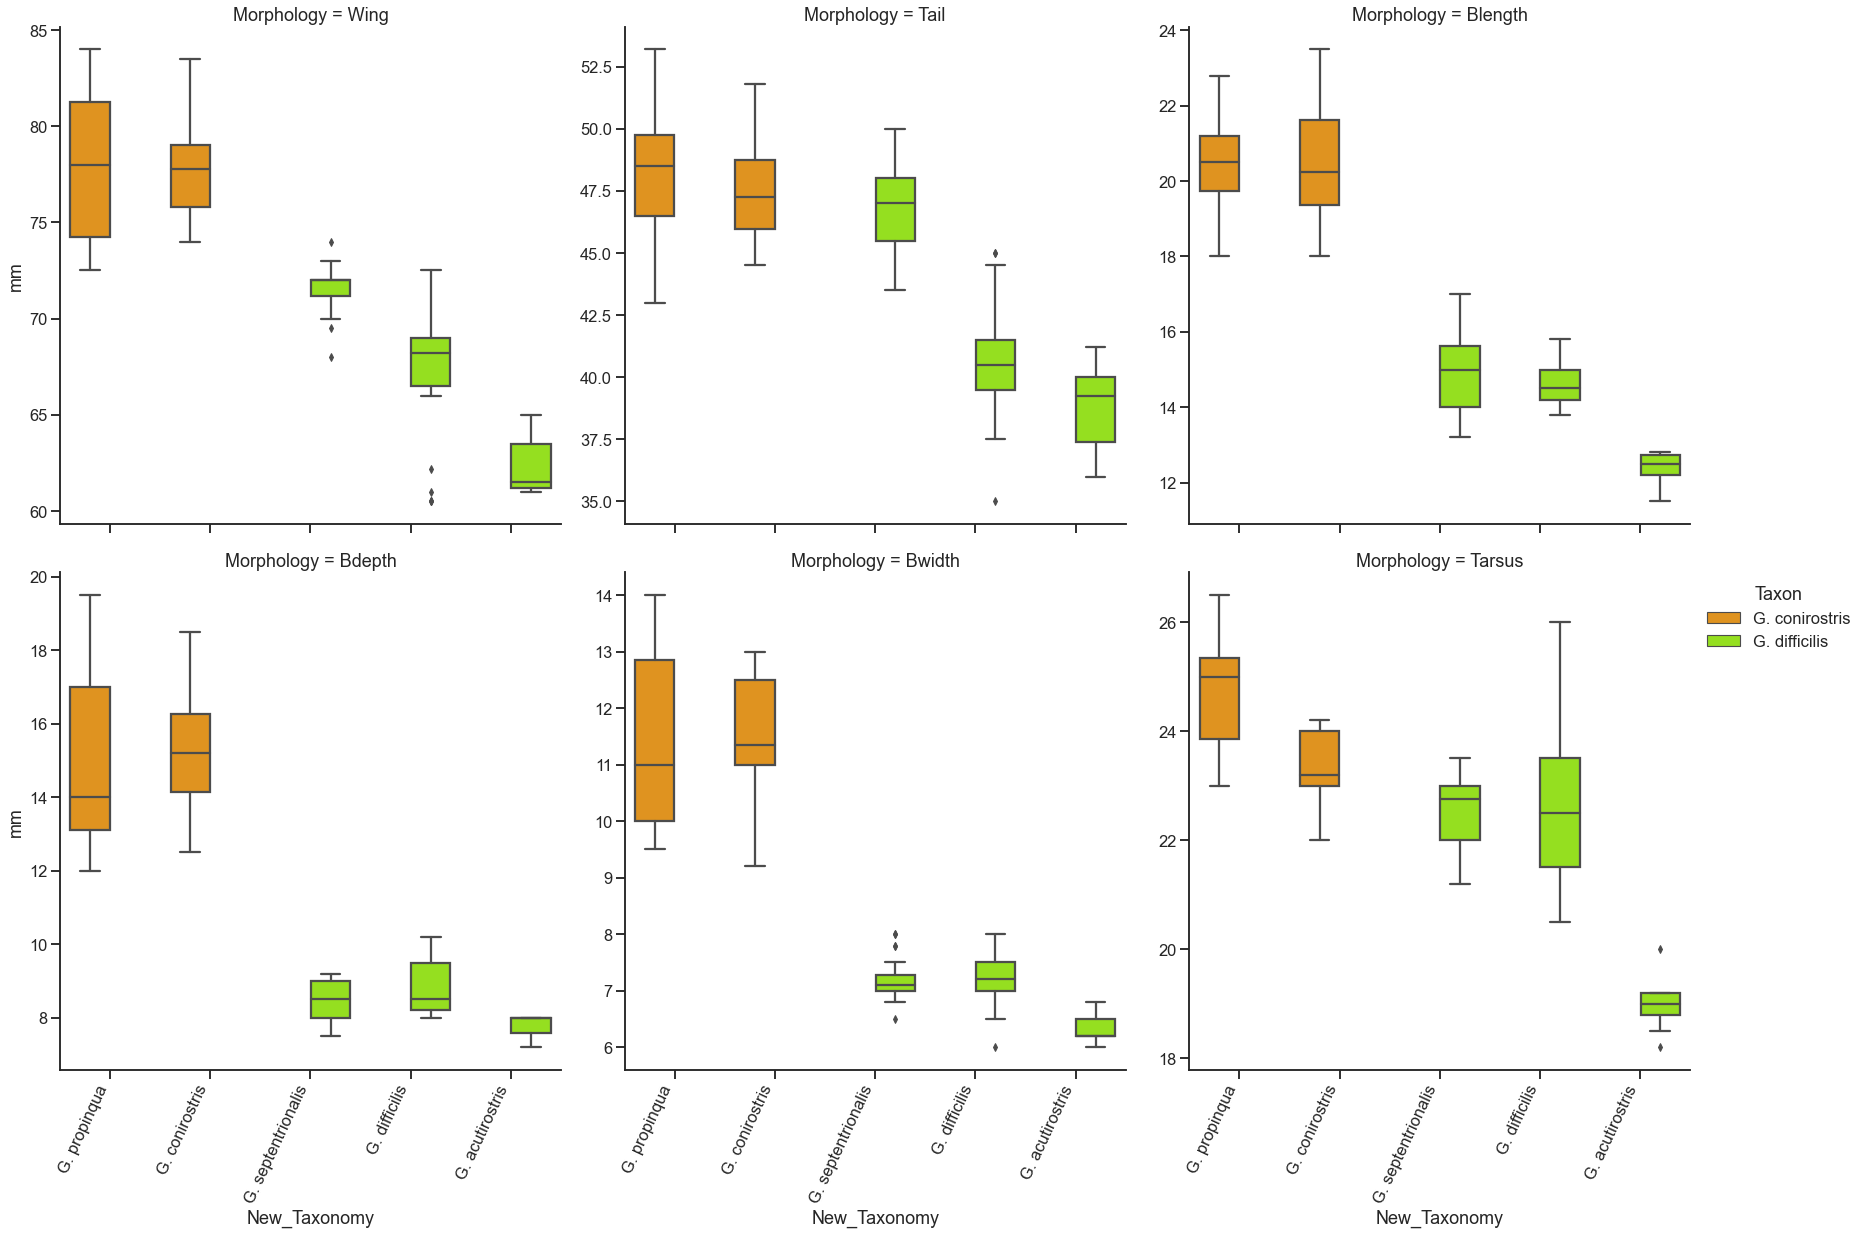

In [226]:
chart = sns.catplot(data=df3, kind = "box", x="New_Taxonomy", y="mm", height = 8, col='Morphology', col_wrap=3, sharey=False,  order=col_ord, hue="Taxon")
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.savefig("plot.svg")